## Phase 3

In [1]:
import re
import parse
import pdfplumber
import pandas as pd
from collections import namedtuple
import matplotlib.pyplot as plt
import seaborn as sns
from PyPDF2 import PdfFileWriter, PdfFileReader
import textwrap
import selenium
from selenium import webdriver
import time
from urllib.request import unquote
from selenium.webdriver.common.keys import Keys
import urllib.request
from pdf2image import convert_from_path
from pdf2image import convert_from_path
import pymongo
import base64
import bson
from bson.binary import Binary
import gridfs
import mlxtend
import os
from selenium.webdriver.chrome.options import Options
chop = Options()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, accuracy_score, average_precision_score, precision_recall_fscore_support)
import mlxtend
import warnings
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv('datasetTout.csv' ,sep=";")
data

,Entreprise,Annee,TCPP,CapitalPropre,PassifNonC,TActif,TPassif,PassifCourant,ActifNonC,ActifCourant,...,ActiviteOrdinaire,Dotation,FT_Exploitation,FT_Investisement,FT_Financement,TDebut,TFin,Variation,Chiffre_Affaire,CapBoursiere
0,ab,2017,8.656198e+06,818957.0,3.918620e+06,8.656198e+06,7.837241e+06,3.918620e+06,4.328099e+06,4.328099e+06,...,115905.0,-7088.0,-160862.0,-134468.0,24349.0,-693532.0,-964513.0,-270981.0,7.169680e+08,6.477660e+08
1,adwya,2016,8.573588e+07,34183160.0,8.413653e+06,8.573588e+07,5.155272e+07,4.313906e+07,3.098662e+07,5.474925e+07,...,2897574.0,-5107669.0,10091073.0,-4625548.0,-5843513.0,917634.0,539647.0,-377988.0,8.475000e+07,1.003205e+08
2,alkim,2017,1.896022e+08,32031513.0,4.113197e+07,1.896022e+08,1.575707e+08,1.164383e+08,8.297612e+07,1.066261e+08,...,0.0,7104041.0,22688464.0,-2116427.0,-17546586.0,5432649.0,8458100.0,3025451.0,1.506840e+08,8.887263e+07
3,alkim,2019,2.361764e+08,-15671729.0,5.354316e+07,2.361764e+08,2.518481e+08,1.983049e+08,1.180882e+08,1.180882e+08,...,0.0,8437546.0,0.0,0.0,0.0,4995043.0,23252154.0,18257111.0,1.769090e+08,8.887263e+07
4,artes,2018,1.761713e+08,115023157.0,3.900000e+05,1.761713e+08,6.114810e+07,6.075810e+07,4.661447e+07,1.295568e+08,...,25295162.0,0.0,0.0,0.0,0.0,91837092.0,56981591.0,-34855501.0,2.354000e+08,1.530000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,tpr,2017,2.087988e+08,100637280.0,2.697701e+07,2.087988e+08,1.058218e+08,7.884482e+07,5.888174e+07,1.499171e+08,...,15028339.0,6404534.0,16883807.0,-7531267.0,1455306.0,-5332021.0,5475825.0,10807846.0,1.544020e+08,2.170000e+08
113,alkim,2018,1.261277e+08,8206197.0,5.806015e+06,1.261277e+08,1.179215e+08,1.121155e+08,3.937832e+07,8.674934e+07,...,-21836518.0,4468358.0,15456455.0,-4261278.0,-9439027.0,2204695.0,4210688.0,2005992.0,1.169700e+08,8.887263e+07
114,pgh,2018,3.491925e+09,848108944.0,1.237285e+09,3.491925e+09,2.625185e+09,1.387901e+09,1.350059e+09,2.141866e+09,...,153655999.0,-134949981.0,101610880.0,-218492157.0,60739713.0,45142432.0,-10999131.0,-56141564.0,2.167700e+09,2.430049e+09
115,unimed,2018,1.320879e+08,93439569.0,1.691149e+07,1.320879e+08,3.864836e+07,2.173687e+07,6.217702e+07,6.991091e+07,...,18359678.0,-7289716.0,13380031.0,-18156649.0,1946671.0,10827192.0,7997245.0,-2829947.0,8.708800e+07,2.470400e+08


In [93]:
data.columns

Index(['Entreprise', 'Annee', 'TCPP', 'CapitalPropre', 'PassifNonC', 'TActif',
       'TPassif', 'PassifCourant', 'ActifNonC', 'ActifCourant', 'Reserves',
       'CapitalSociale', 'TProdExploitation', 'TChargeExploitation',
       'R_Exploitation', 'Res_Exsercice', 'ActiviteOrdinaire', 'Dotation',
       'FT_Exploitation', 'FT_Investisement', 'FT_Financement', 'TDebut',
       'TFin', 'Variation', 'Chiffre_Affaire', 'CapBoursiere'],
      dtype='object')

In [94]:
columnsNames = ['TCPP', 'CapitalPropre', 'PassifNonC', 'TActif',
       'TPassif', 'PassifCourant', 'ActifNonC', 'ActifCourant', 'Reserves',
       'CapitalSociale', 'TProdExploitation', 'TChargeExploitation',
       'R_Exploitation', 'Res_Exsercice', 'ActiviteOrdinaire', 'Dotation','TDebut','TFin', 'Variation']

In [95]:
modeling_Dataset2=data[columnsNames].copy()

### Ratios

In [96]:
def Capitaux_Permanents(CapitalPropre,PassifNonC):
    return CapitalPropre+PassifNonC

def Ebit(Chiffre_Affaire,Dotation,TChargeExploitation):
    return Chiffre_Affaire-Dotation-TChargeExploitation


def Ratio_Autonomie_financiere_elargie(CapitalPropre,TPassif):
    if TPassif!=0:
        return CapitalPropre/TPassif 
    
def Ratio_Autonomie_financiere_globale(CapitalPropre,TCPP):
    if TCPP!=0:
        return CapitalPropre/TCPP 

def Ratio_independance_Financiere(CapitalPropre,PassifNonC):
    if Capitaux_Permanents(CapitalPropre,PassifNonC)!=0:
        return CapitalPropre/Capitaux_Permanents(CapitalPropre,PassifNonC)

def Ratio_solvabililite_Generale(TPassif,TActif):
    Situation_net=TActif-TPassif
    if TPassif!=0:
        return Situation_net/TPassif
    
def Ratio_rentabilité_actif(R_Exploitation,TActif):
    if TActif!=0:
        return R_Exploitation/TActif

def coefficient_exploitation(TChargeExploitation,Produit_Net):
     if Produit_Net!=0:
        return TChargeExploitation/Produit_Net
    
def Ratio_endettement(TPassif,TActif):
    if TActif!=0:
        return TPassif/TActif
        
def Ratio_rotation_actifs(ChiffreAffaire,TActif):
    if TActif!=0:
        return ChiffreAffaire/TActif

def Ratio_rotation_capitauxpropres(ChiffreAffaire,CapitalPropre):
    if CapitalPropre!=0:
        return ChiffreAffaire/CapitalPropre
    
def bfr(ActifCourant,PassifCourant):
    return ActifCourant-PassifCourant
    
def Ratio_financement(Reserves,TActif):
    if TActif!=0:
        return Reserves/TActif
    
def Ratio_analyse_sante(ActifCourant,PassifCourant,TActif):
    if TActif!=0:
        return bfr(ActifCourant,PassifCourant)/TActif 
    
def Ratio_productivite(Chiffre_Affaire,Dotation,TChargeExploitation,TActif):
     if TActif!=0:
        return Ebit(Chiffre_Affaire,Dotation,TChargeExploitation)/TActif 

    
# recherche de certaines valeurs
def Ratio_liquidite_generale(PassifCourant,ActifCourant):
    if PassifCourant!=0:
        return ActifCourant/PassifCourant
    
def D (CapBoursiere,TPassif):
    if TPassif!=0:
        return CapBoursiere/TPassif


#def Ratio_productivite(ChiffreAffaire,NbEmployers):
#    if NbEmployers!=0:
 #       return ChiffreAffaire/NbEmployers








In [97]:
from collections import namedtuple

lines=namedtuple('lines','Entreprise Annee Ratio_Autonomie_financiere_elargie Ratio_independance_Financiere  Ratio_solvabililite_Generale Ratio_Autonomie_financiere_globale Ratio_rentabilité_actif Ratio_financement Ratio_endettement Ratio_rotation_actifs Ratio_rotation_capitauxpropres Ratio_analyse_sante Ratio_productivite D') 
R1=0
R2=0
R3=0
R4=0
R5=0
R7=0
R8=0
R9=0
R10=0
R11=0
R12=0
ratio=[]
for index, row in data.iterrows():
    R1=Ratio_Autonomie_financiere_elargie(row["CapitalPropre"],row["TPassif"])
    R2=Ratio_independance_Financiere(row["CapitalPropre"],row["PassifNonC"])
    R3=Ratio_solvabililite_Generale(row["TPassif"],row["TActif"])
    R4=Ratio_Autonomie_financiere_globale(row["CapitalPropre"],row["TCPP"])
    R5=Ratio_rentabilité_actif(row["R_Exploitation"],row["TActif"])
    R6=Ratio_financement(row["Reserves"],row["TActif"])
    R7=Ratio_endettement(row["TPassif"],row["TActif"])
    R8=Ratio_rotation_actifs(row["Chiffre_Affaire"],row["TActif"])
    R9=Ratio_rotation_capitauxpropres(row["Chiffre_Affaire"],row["CapitalPropre"])
    R10=Ratio_analyse_sante(row["ActifCourant"],row["PassifCourant"],row["TActif"])
    R11=Ratio_productivite(row["Chiffre_Affaire"],row["Dotation"],row["TChargeExploitation"],row["TActif"])
    R12=D(row["CapBoursiere"],row["TPassif"])

    ratio.append(lines(row["Entreprise"],row["Annee"],R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12))
    
    
                


In [98]:
dfr=pd.DataFrame(ratio)  
dfr


,Entreprise,Annee,Ratio_Autonomie_financiere_elargie,Ratio_independance_Financiere,Ratio_solvabililite_Generale,Ratio_Autonomie_financiere_globale,Ratio_rentabilité_actif,Ratio_financement,Ratio_endettement,Ratio_rotation_actifs,Ratio_rotation_capitauxpropres,Ratio_analyse_sante,Ratio_productivite,D
0,ab,2017,0.104496,0.172864,0.104496,0.094609,0.014765,0.066104,0.905391,82.827126,875.464768,0.047305,82.830555,82.652301
1,adwya,2016,0.663072,0.802482,0.663072,0.398703,0.073737,0.137976,0.601297,0.988501,2.479291,0.135418,1.082767,1.945979
2,alkim,2017,0.203283,0.437807,0.203283,0.168941,-0.084144,0.168976,0.831059,0.794737,4.704242,-0.051751,0.773762,0.564017
3,alkim,2019,-0.062227,-0.413814,-0.062227,-0.066356,-0.080850,-0.025059,1.066356,0.749055,-11.288416,-0.339648,0.760702,0.352882
4,artes,2018,1.881059,0.996621,1.881059,0.652905,0.135891,0.120338,0.347095,1.336200,2.046544,0.390522,1.336200,2.502122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,tpr,2017,0.951007,0.788605,0.973117,0.481982,0.098644,0.168645,0.506812,0.739477,1.534243,0.340386,0.732935,2.050617
113,alkim,2018,0.069590,0.585646,0.069590,0.065063,-0.196848,0.314977,0.934937,0.927394,14.253862,-0.201115,0.862261,0.753659
114,pgh,2018,0.323066,0.406690,0.330163,0.242877,0.065714,0.154778,0.751787,0.620775,2.555922,0.215917,0.682091,0.925667
115,unimed,2018,2.417685,0.846748,2.417685,0.707404,0.180899,0.325980,0.292596,0.659318,0.932025,0.364712,0.720184,6.391992


In [99]:
dfr.to_csv('Ratios.csv',index=False)

### Correlation

In [100]:
def detect_collinear_features(x, threshold):

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    #drops = set(drop_cols)
    #x = x.drop(columns=drops)

    return x

Text(0.5, 1.0, 'Correlation matrix')

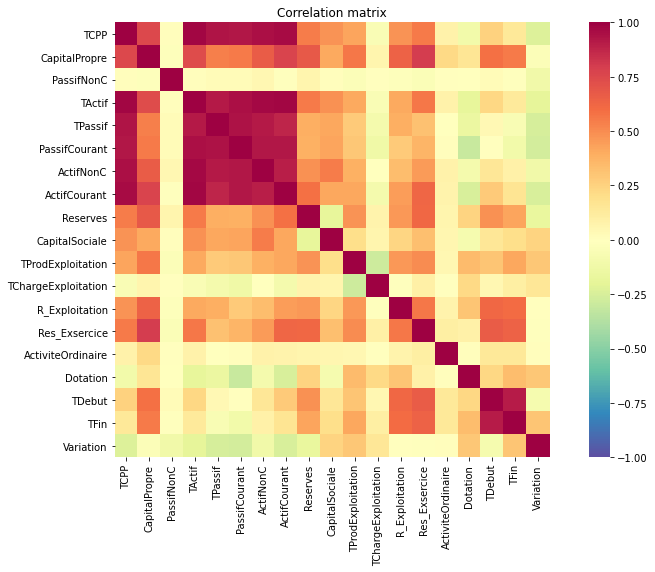

In [101]:
f, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(modeling_Dataset2.corr(),cmap='Spectral_r',  square=True, vmin=-1 ,vmax=1, ax=ax)
plt.title('Correlation matrix')



Text(0.5, 1.0, 'Correlation matrix')

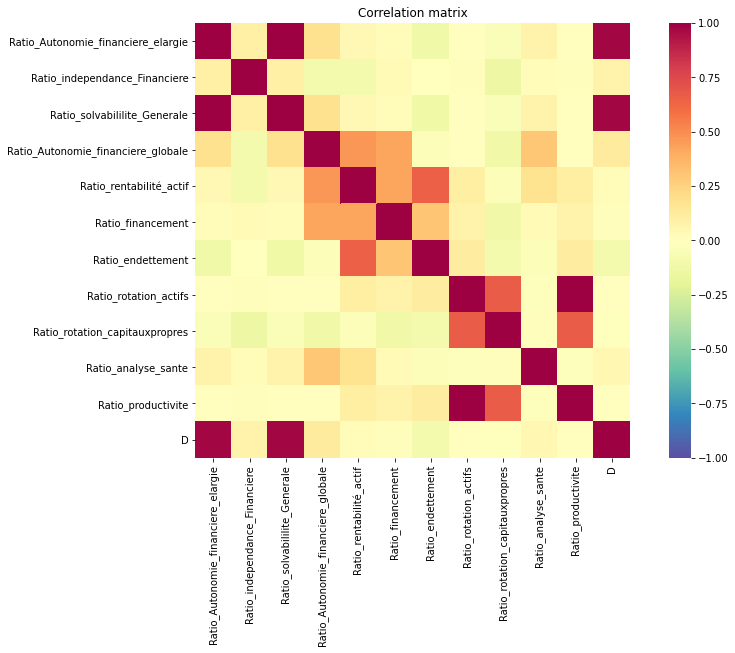

In [102]:
f, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(dfr.corr(),cmap='Spectral_r',  square=True, vmin=-1 ,vmax=1, ax=ax)
plt.title('Correlation matrix')


In [103]:
detect_collinear_features(dfr,0.8).head(5)


Ratio_solvabililite_Generale | Ratio_Autonomie_financiere_elargie | 1.0
Ratio_productivite | Ratio_rotation_actifs | 1.0
D | Ratio_Autonomie_financiere_elargie | 0.98
D | Ratio_solvabililite_Generale | 0.98


,Entreprise,Annee,Ratio_Autonomie_financiere_elargie,Ratio_independance_Financiere,Ratio_solvabililite_Generale,Ratio_Autonomie_financiere_globale,Ratio_rentabilité_actif,Ratio_financement,Ratio_endettement,Ratio_rotation_actifs,Ratio_rotation_capitauxpropres,Ratio_analyse_sante,Ratio_productivite,D
0,ab,2017,0.104496,0.172864,0.104496,0.094609,0.014765,0.066104,0.905391,82.827126,875.464768,0.047305,82.830555,82.652301
1,adwya,2016,0.663072,0.802482,0.663072,0.398703,0.073737,0.137976,0.601297,0.988501,2.479291,0.135418,1.082767,1.945979
2,alkim,2017,0.203283,0.437807,0.203283,0.168941,-0.084144,0.168976,0.831059,0.794737,4.704242,-0.051751,0.773762,0.564017
3,alkim,2019,-0.062227,-0.413814,-0.062227,-0.066356,-0.080850,-0.025059,1.066356,0.749055,-11.288416,-0.339648,0.760702,0.352882
4,artes,2018,1.881059,0.996621,1.881059,0.652905,0.135891,0.120338,0.347095,1.336200,2.046544,0.390522,1.336200,2.502122


## Z score

In [104]:
dfr['Z_Score']=1.2*dfr['Ratio_analyse_sante']+1.4*dfr['Ratio_financement']+3.3*dfr['Ratio_productivite']+0.6*dfr['D'] +1*dfr['Ratio_rotation_actifs']

In [105]:
y=[]
for index, row in dfr.iterrows(): 
    if row['Z_Score']<2.4:
        y.append(0)
    elif row['Z_Score']>=2.4:
        y.append(1)

   

In [106]:
dfr['y']=y
modeling_Dataset2['y']=y
modeling_Dataset2.to_csv('TrainDataset.csv',index=False)


In [107]:
import plotly.offline as po
import plotly.graph_objs as go


plot_by_labels = dfr['y'].value_counts().keys().tolist()
plot_by_values = dfr['y'].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_labels,
           values = plot_by_values,
           marker = dict(colors =  [ 'Teal' ,'white'],
                         line = dict(color = "Grey",
                                     width =  1.5)),
           rotation = 90,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "Solvability",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [108]:
dfr.to_csv('allRatios.csv',index=False)
data=dfr

### Outliers Detection


The presence of outliers in the dataset can result in a poor fit and lower the predictive modeling performance.

We are going to create a function called diagnostic_plots to visialise the feautres distribution which takes as parameters the dataset and the feature to plot

* distplot: Depicts the variation in the data distribution
* probplot: Generates a probability plot of sample data against the quantiles of a specified theoretical distribution
* boxplot: A method to graphically show the spread of a numerical variable through quartiles

In [109]:
import scipy.stats as stats
def diagnostic_plots(df, variable):


    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

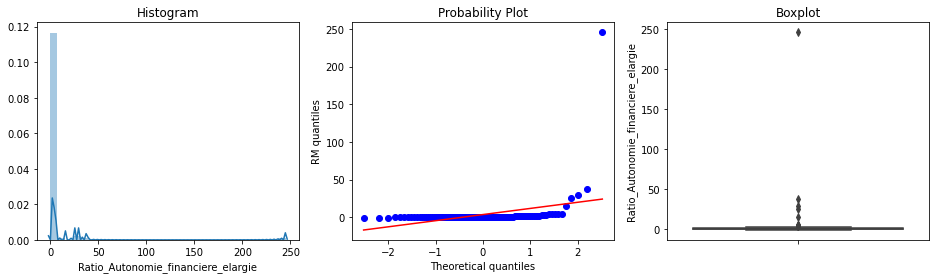

In [110]:
diagnostic_plots(data, 'Ratio_Autonomie_financiere_elargie')


We are going to use quartile method to confirm that we don't have outliers in our dataset

In [111]:
#Z_Score
quartile_1, quartile_3 = np.percentile(data["Ratio_Autonomie_financiere_elargie"], [25, 75])
print('Z_Score :')
print('Quartile 1 : ',quartile_1)
print('Quartile 3 : ',quartile_3)
IQR = quartile_3 - quartile_1
lower_bound = quartile_1 - (IQR * 1.5)
upper_bound = quartile_3 + (IQR * 1.5)
print(np.where((data["Ratio_Autonomie_financiere_elargie"] < lower_bound) | data["Ratio_Autonomie_financiere_elargie"] > upper_bound))


Z_Score :
Quartile 1 :  0.11142928853278121
Quartile 3 :  1.2884006197332538
(array([], dtype=int64),)


In [112]:
data=dfr.copy()

 # <font color=darkblue>First Case : test With ratios</font> 

### Splitting the data into training and test sets

In [113]:
features=['Ratio_Autonomie_financiere_elargie',
       'Ratio_independance_Financiere', 'Ratio_solvabililite_Generale',
       'Ratio_Autonomie_financiere_globale', 'Ratio_rentabilité_actif',
       'Ratio_financement', 'Ratio_endettement', 'Ratio_analyse_sante']

In [114]:
y = data.iloc[:,15]
X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### Data Standardisation

Standardization refers to shifting the distribution of each attribute to have a mean of 0 and a standard deviation of 1.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.
the estimators might behave badly if the individual features do not more or less look like standard normally distributed data

Standardisation with StandardScaler

In [115]:
scaler=StandardScaler()
X_train[features]=scaler.fit_transform(X_train[features])
X_test[features]=scaler.transform(X_test[features])

StandardScaler standardize the features by removing the mean and scaling to unit variance

# <font color=red>Modeling and Evaluation  </font>

# <font color=purpuple>Gradient Boost Classifier</font>


Creating a copy of the train set and test set 

In [116]:
X_train_Gboost,y_train_Gboost,X_test_Gboost,y_test_Gboost= X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [118]:
Gbc=GradientBoostingClassifier(n_estimators=100)

param_grid={'loss' : ['deviance', 'exponential'],
            'criterion' : ['friedman_mse', 'mse', 'mae'],
            'max_features' : ['auto', 'sqrt', 'log2']}
grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=2)
grid.fit(X_train_Gboost, y_train_Gboost)
grid.best_score_
grid.best_params_

{'criterion': 'mae', 'loss': 'exponential', 'max_features': 'sqrt'}

Display the best score

In [119]:
grid.best_score_

0.7742830712303423

Creating the model using the best parameters for Gradient Boosting Classifier

In [121]:
final_Gbc=GradientBoostingClassifier(criterion= 'mae', loss= 'exponential', max_features= 'sqrt')
final_Gbc.fit(X_train_Gboost, y_train_Gboost)

GradientBoostingClassifier(criterion='mae', loss='exponential',
                           max_features='sqrt')

Displaying the train score and the test score 

In [122]:
train_score_gb = cross_val_score(final_Gbc,X_train_Gboost,y_train_Gboost, cv= 5, n_jobs=1, scoring='accuracy')
test_score_gb = cross_val_score(final_Gbc,X_test_Gboost,y_test_Gboost, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(train_score_gb ))
print('accuarcy test score',np.mean(test_score_gb))



accuarcy train score 0.7403508771929824
accuarcy test score 0.79


### Classification report

In [123]:
ypred1 =final_Gbc.predict(X_test_Gboost)
print(classification_report(y_test_Gboost, ypred1))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.88      0.83      0.86        18

    accuracy                           0.79        24
   macro avg       0.73      0.75      0.74        24
weighted avg       0.80      0.79      0.80        24



### Confusion matrix visualization

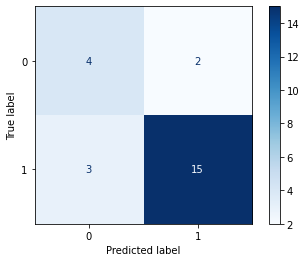

In [124]:
plot_confusion_matrix(final_Gbc, X_test_Gboost, y_test_Gboost,cmap=plt.cm.Blues)  
plt.show()


### Features importance visualization

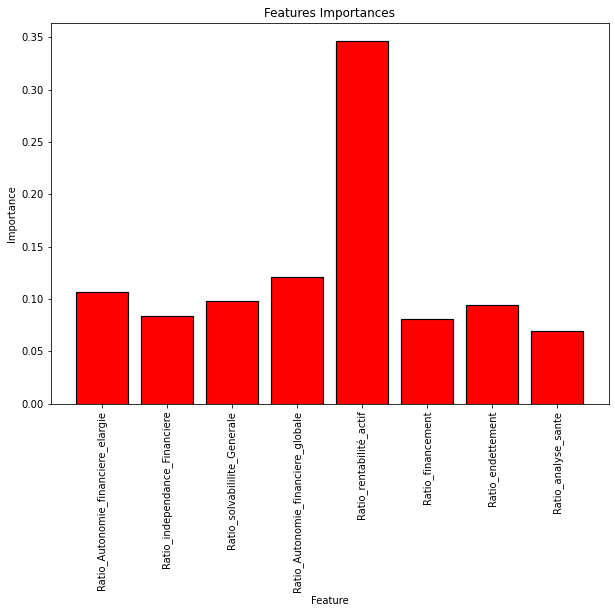

In [125]:
plt.figure(figsize=(10,7))
feature_list=X_train_Gboost.columns
importances = list(final_Gbc.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

### Feature Selection using RFECV

In [126]:
selector = RFECV(final_Gbc,
                 step=1,
                 min_features_to_select=9,
                 cv=5)
selector.fit(X_train_Gboost, y_train_Gboost)
selector.grid_scores_


array([0.74093567])

This array indicates the score of Gradient Boosting classifier at each iteration 

In [127]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1])

This array gave us the ranking of each features. The feature having rank 1 have high importance 

Display Selected features

In [128]:
feature_support = selector.get_support()
gb_feature = X_train_Gboost.loc[:,feature_support].columns.tolist()
gb_feature

['Ratio_Autonomie_financiere_elargie',
 'Ratio_independance_Financiere',
 'Ratio_solvabililite_Generale',
 'Ratio_Autonomie_financiere_globale',
 'Ratio_rentabilité_actif',
 'Ratio_financement',
 'Ratio_endettement',
 'Ratio_analyse_sante']

# <font color=purpuple>xgBoost </font>


In [129]:
type(X_test)

pandas.core.frame.DataFrame

Creating a copy of the train set and test set

In [130]:
X_train_xgb,y_train_xgb,X_test_xgb,y_test_xgb = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [131]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 5,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train_xgb,y_train_xgb)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 340 tasks      | elapsed:    9.7s


[00:42:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=5)]: Done 480 out of 480 | elapsed:   13.1s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=Non

Display best parameters

In [132]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 60}

Creating the model using the best parameters

In [136]:
xgboost=XGBClassifier(
    learning_rate= 0.02 ,n_estimators= 60,max_depth= 2
)
xgboost.fit(X_train_xgb, y_train_xgb)

[00:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Displaying the train score and the test score 

In [137]:
train_score_xgb = cross_val_score( xgboost,X_train_xgb,y_train_xgb, cv= 5, n_jobs=1, scoring='accuracy')
test_score_xgb = cross_val_score(xgboost,X_test_xgb,y_test_xgb, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(train_score_xgb ))
print('accuarcy test score',np.mean(test_score_xgb))


[00:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Classification report

In [138]:
ypred =xgboost.predict(X_test_xgb)
print(classification_report(y_test_xgb, ypred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.88      0.83      0.86        18

    accuracy                           0.79        24
   macro avg       0.73      0.75      0.74        24
weighted avg       0.80      0.79      0.80        24



### Confusion matrix visualization

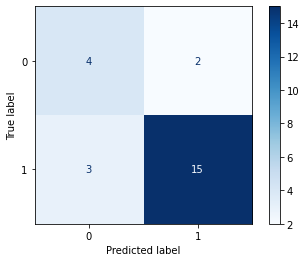

In [139]:
plot_confusion_matrix(xgboost, X_test_xgb, y_test_xgb,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

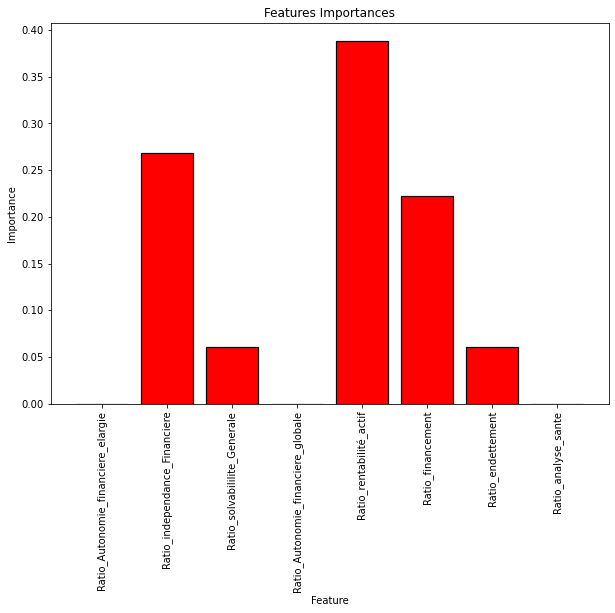

In [140]:
plt.figure(figsize=(10,7))
feature_list=X_train_xgb.columns
importances = list(xgboost.feature_importances_)
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

### Feature Selection using RFECV

In [141]:
rfecv = RFECV(xgboost,step=1,
                 min_features_to_select=5,
                 cv=5)
rfecv.fit(X_train_xgb, y_train_xgb)

[00:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RFECV(cv=5,
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.02,
                              max_delta_step=0, max_depth=2, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=60, n_jobs=8, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None),
      min_features_to_select=5)

In [142]:
rfecv.ranking_

array([4, 1, 1, 3, 1, 1, 1, 2])

Display the selected features

In [143]:
feature_xgb = rfecv.get_support()
xgb_feature = X_train_xgb.loc[:,feature_xgb].columns.tolist()
print('Selected features :')
print(xgb_feature)
print('The number of features selected : ', len(xgb_feature))

Selected features :
['Ratio_independance_Financiere', 'Ratio_solvabililite_Generale', 'Ratio_rentabilité_actif', 'Ratio_financement', 'Ratio_endettement']
The number of features selected :  5


In [144]:
X_train_xgb=X_train_xgb[xgb_feature]
X_test_xgb=X_test_xgb[xgb_feature]
xgboost.fit(X_train_xgb,y_train_xgb)

[00:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [145]:
X_train_xgb.shape

(93, 5)

Displaying the train score and the test score after feature selection

In [146]:
train_score_xgb = cross_val_score( xgboost,X_train_xgb,y_train_xgb, cv= 5, n_jobs=1, scoring='accuracy')
test_score_xgb = cross_val_score(xgboost,X_test_xgb,y_test_xgb, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(train_score_xgb ))
print('accuarcy test score',np.mean(test_score_xgb))


[00:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Classification report after feature selection

In [147]:
ypred =xgboost.predict(X_test_xgb)
print(classification_report(y_test_xgb, ypred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.88      0.83      0.86        18

    accuracy                           0.79        24
   macro avg       0.73      0.75      0.74        24
weighted avg       0.80      0.79      0.80        24



# <font color=purpuple>Ada Boost </font>


Creating a copy of the train set and test set

In [401]:
X_train_ada,y_train_ada,X_test_ada,y_test_ada = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [149]:
ada_classifier = AdaBoostClassifier(random_state=42)

param_grid =  {'n_estimators':[100, 200, 300, 400, 500 ], 
              'learning_rate':[0.05, 0.1, 0.15, 0.2]}
grid=GridSearchCV( ada_classifier,param_grid,cv=5)
grid.fit(X_train_ada, y_train_ada)
grid.best_params_


{'learning_rate': 0.05, 'n_estimators': 100}

In [150]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=42)

Creating the model 

In [396]:
ab = AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=42)
ab.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=42)

##### Cross Validation

In [402]:
score_train_ada = cross_val_score(ab, X_train_ada,y_train_ada, cv= 5, n_jobs=1, scoring='accuracy')
score_test_ada = cross_val_score(ab, X_test_ada,y_test_ada, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_ada))
print('accuarcy test score',np.mean(score_test_ada))

accuarcy train score 0.7514619883040935
accuarcy test score 0.7500000000000001


### Classification report

In [403]:
ypred=ab.predict(X_test_ada)
print(classification_report(y_test_ada,ypred,digits=4))

              precision    recall  f1-score   support

           0     0.7500    0.5000    0.6000         6
           1     0.8500    0.9444    0.8947        18

    accuracy                         0.8333        24
   macro avg     0.8000    0.7222    0.7474        24
weighted avg     0.8250    0.8333    0.8211        24



### Confusion matrix visualization

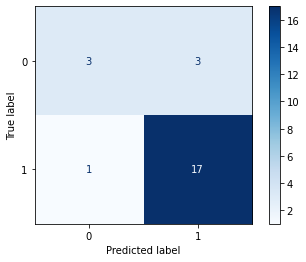

In [404]:
plot_confusion_matrix(ab, X_test_ada, y_test_ada,cmap=plt.cm.Blues)  
plt.show()

### Feature Selection using RFECV

In [405]:
selector = RFECV(ab,
                 step=1,
                 min_features_to_select=5,
                 cv=5)
selector.fit(X_train_ada, y_train_ada)
print(selector.ranking_)
selector.grid_scores_

[4 1 1 3 1 1 1 2]


array([0.75146199, 0.75146199, 0.75146199, 0.75146199])

Display selected features

In [406]:
feature_support = selector.get_support()
ada_feature = X_train_ada.loc[:,feature_support].columns.tolist()
ada_feature

['Ratio_independance_Financiere',
 'Ratio_solvabililite_Generale',
 'Ratio_rentabilité_actif',
 'Ratio_financement',
 'Ratio_endettement']

In [407]:
X_train_ada=X_train_ada[ada_feature]
X_test_ada=X_test_ada[ada_feature]
ab.fit(X_train_ada,y_train_ada)

AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=42)

In [408]:
X_train_ada.shape

(93, 5)

Displaying the train score and the test score after feature selection

In [409]:
score_train_ada = cross_val_score(ab, X_train_ada,y_train_ada, cv= 5, n_jobs=1, scoring='accuracy')
score_test_ada = cross_val_score(ab, X_test_ada,y_test_ada, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_ada))
print('accuarcy test score',np.mean(score_test_ada))

accuarcy train score 0.7403508771929823
accuarcy test score 0.7500000000000001


In [410]:
ypred=ab.predict(X_test_ada)
print(classification_report(y_test_ada,ypred,digits=4))

              precision    recall  f1-score   support

           0     0.6667    0.6667    0.6667         6
           1     0.8889    0.8889    0.8889        18

    accuracy                         0.8333        24
   macro avg     0.7778    0.7778    0.7778        24
weighted avg     0.8333    0.8333    0.8333        24



# <font color=purpuple>Logitic Regression </font>

Creating a copy of the train set and test set

In [187]:
X_train_lr,y_train_lr,X_test_lr,y_test_lr = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [188]:
param_grid=[{'penalty': ['l1','l2'], 
            'solver' : ['lbfgs', 'liblinear','newton-cg', 'sag', 'saga']}
           ]
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train_lr, y_train_lr)
grid.best_score_

0.72046783625731

In [189]:
grid.best_params_


{'penalty': 'l1', 'solver': 'liblinear'}

Creating the model

In [190]:
finalLog=LogisticRegression(penalty='l1',solver= 'liblinear')
finalLog.fit(X_train_lr, y_train_lr)

LogisticRegression(penalty='l1', solver='liblinear')

Displaying the train score and the test score 

In [191]:
score_train_lr = cross_val_score(finalLog, X_train_lr,y_train_lr, cv= 5, n_jobs=1, scoring='accuracy')
score_test_lr = cross_val_score(finalLog, X_test_lr,y_test_lr, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_lr))
print('accuarcy test score',np.mean(score_test_lr))

accuarcy train score 0.72046783625731
accuarcy test score 0.67


### Classification report

In [192]:
ypred =finalLog.predict(X_test_lr)
print(classification_report(y_test_lr, ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.74      0.94      0.83        18

    accuracy                           0.71        24
   macro avg       0.37      0.47      0.41        24
weighted avg       0.55      0.71      0.62        24



### Confusion matrix visualization

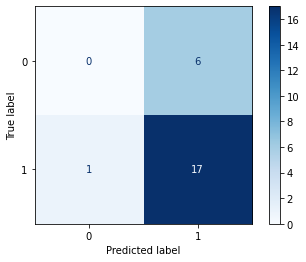

In [193]:
plot_confusion_matrix(finalLog, X_test_lr, y_test_lr,cmap=plt.cm.Blues)  
plt.show()

### Feature Selection using RFECV

In [194]:
selector = RFECV(finalLog,
                 step=1,
                 min_features_to_select=5,
                 cv=5)
selector.fit(X_train_lr, y_train_lr)
selector.grid_scores_


array([0.72046784, 0.72046784, 0.72046784, 0.72046784])

In [195]:
selector.ranking_

array([4, 1, 1, 3, 1, 1, 2, 1])

Display feature selected

In [196]:
feature_support = selector.get_support()
lr_feature = X_train_lr.loc[:,feature_support].columns.tolist()
lr_feature

['Ratio_independance_Financiere',
 'Ratio_solvabililite_Generale',
 'Ratio_rentabilité_actif',
 'Ratio_financement',
 'Ratio_analyse_sante']

In [197]:
X_train_lr=X_train_lr[lr_feature]
X_test_lr=X_test_lr[lr_feature]
finalLog.fit(X_train_lr,y_train_lr)

LogisticRegression(penalty='l1', solver='liblinear')

In [198]:
X_train_lr.shape

(93, 5)

Displaying the train score and the test score after feature selection

In [199]:
score_train_lr = cross_val_score(finalLog, X_train_lr,y_train_lr, cv= 5, n_jobs=1, scoring='accuracy')
score_test_lr = cross_val_score(finalLog, X_test_lr,y_test_lr, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_lr))
print('accuarcy test score',np.mean(score_test_lr))

accuarcy train score 0.72046783625731
accuarcy test score 0.7100000000000001


# <font color=purpuple>KNN </font>

Creating a copy of the train set and test set

In [224]:
X_train_knn,y_train_knn,X_test_knn,y_test_knn = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [225]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan'],
              'weights' : ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train_knn, y_train_knn)
print(grid.best_score_)
print(grid.best_params_)
model = grid.best_estimator_



0.8269005847953217
{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}


In [226]:
knn=KNeighborsClassifier(metric ='euclidean', n_neighbors= 6, weights= 'distance')
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')

In [227]:
score_train_knn = cross_val_score(knn, X_train_knn,y_train_knn, cv= 5, n_jobs=1, scoring='accuracy')
score_test_knn = cross_val_score(knn, X_test_knn,y_test_knn, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_knn))
print('accuarcy test score',np.mean(score_test_knn))

accuarcy train score 0.8269005847953217
accuarcy test score 0.63


### Classification report 

In [228]:
ypred =knn.predict(X_test_knn)
print(classification_report(y_test_knn, ypred))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.81      0.94      0.87        18

    accuracy                           0.79        24
   macro avg       0.74      0.64      0.66        24
weighted avg       0.77      0.79      0.76        24



### Confusion matrix visualization

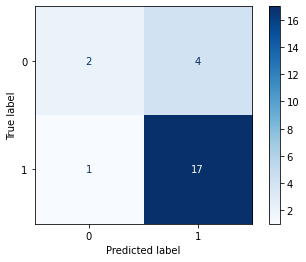

In [229]:
plot_confusion_matrix(knn, X_test_knn, y_test_knn,cmap=plt.cm.Blues)  
plt.show()

In [230]:
new=pd.concat([X_train_knn, y_train_knn],axis=1)

### Feature Selection

#### Correlation Matrix

A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.

Each row and column represents a variable, and each value in this matrix is the correlation coefficient between the variables represented by the corresponding row and column.

The Correlation matrix is an important metric that is computed to summarize data to understand the relationship between various variables and make decisions accordingly.

And we are going to use it to reduce the dimension of our dataset (features selection)

Text(0.5, 1.0, 'Correlation matrix')

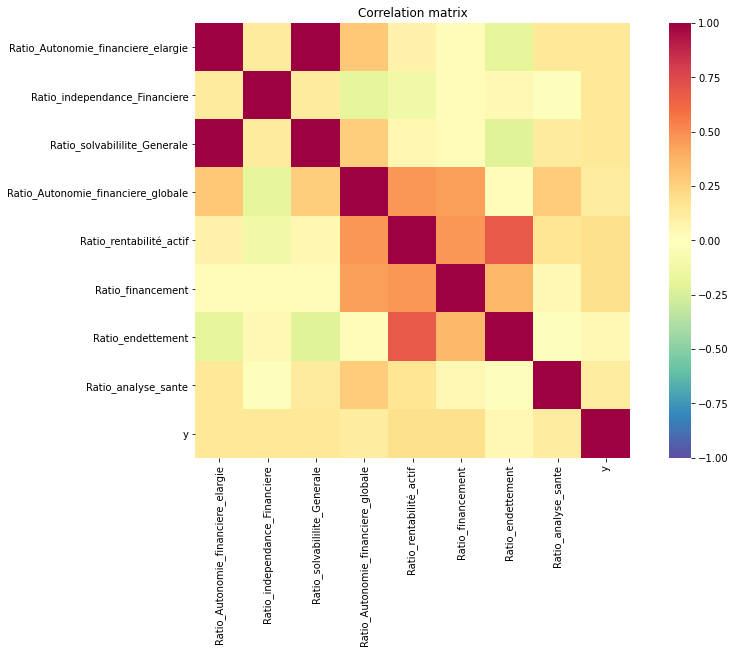

In [231]:
f, ax = plt.subplots(figsize=(14, 8))
corr1= new.corr()


sns.heatmap(corr1,cmap='Spectral_r',  square=True, vmin=-1 ,vmax=1, ax=ax)
plt.title('Correlation matrix')

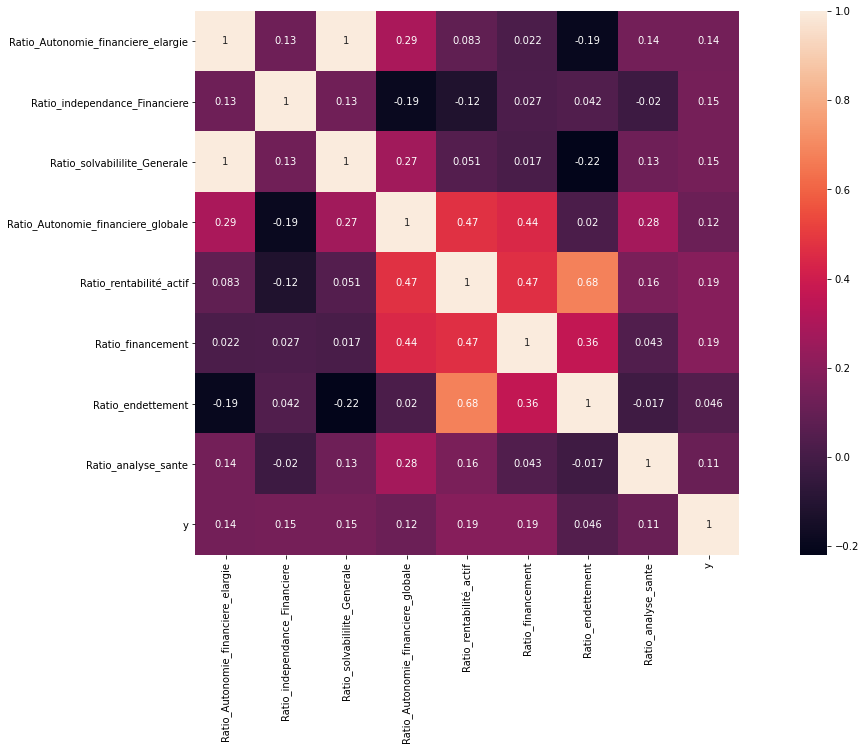

In [232]:
import seaborn as sns

f, ax = plt.subplots(figsize=(22, 10))
corr = new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            square=True, annot=True, ax=ax)

In [233]:
corr = new.corr()
corr

,Ratio_Autonomie_financiere_elargie,Ratio_independance_Financiere,Ratio_solvabililite_Generale,Ratio_Autonomie_financiere_globale,Ratio_rentabilité_actif,Ratio_financement,Ratio_endettement,Ratio_analyse_sante,y
Ratio_Autonomie_financiere_elargie,1.000000,0.126897,0.997154,0.290960,0.082774,0.022404,-0.190161,0.142653,0.141059
Ratio_independance_Financiere,0.126897,1.000000,0.129000,-0.186420,-0.118354,0.027118,0.041793,-0.019502,0.145742
Ratio_solvabililite_Generale,0.997154,0.129000,1.000000,0.271332,0.050784,0.016820,-0.218720,0.125811,0.146619
Ratio_Autonomie_financiere_globale,0.290960,-0.186420,0.271332,1.000000,0.474736,0.443536,0.019959,0.277208,0.115536
Ratio_rentabilité_actif,0.082774,-0.118354,0.050784,0.474736,1.000000,0.470437,0.680285,0.160081,0.191947
Ratio_financement,0.022404,0.027118,0.016820,0.443536,0.470437,1.000000,0.364884,0.042519,0.193217
Ratio_endettement,-0.190161,0.041793,-0.218720,0.019959,0.680285,0.364884,1.000000,-0.016879,0.046051
Ratio_analyse_sante,0.142653,-0.019502,0.125811,0.277208,0.160081,0.042519,-0.016879,1.000000,0.111538
y,0.141059,0.145742,0.146619,0.115536,0.191947,0.193217,0.046051,0.111538,1.000000


We are going to use the last row of our dataset which represent the target and we will try to filter out those feature whose correlation coefficient value with the target are greater than a threshold that we will determine later.

In [234]:
C=corr.tail(1)

In [235]:
listdict=C.to_dict('records')  


In [236]:
for l in listdict:
    l.pop('y')

In a range of [0,1] we will increase the threshold with 0.01 and we will compare it with the corrolation coffecient of each feature and to finally show the train score and test score using those thresholds.

In [237]:
LbestTr=[]
LbestTest=[]
d={}
d2={}
for seuil in np.arange(0,1,0.01):
    Ll=[]
    
    for l in listdict:
        for k,v in l.items():
            if abs(v)  >seuil:  
                Ll.append(k)
                
                Xtr=X_train[Ll]
                Xt=X_test[Ll]
               
                knn.fit(Xtr,y_train_knn)
                
    score_train_knn = cross_val_score(knn, Xtr,y_train_knn, cv= 5, n_jobs=1, scoring='accuracy')
    score_test_knn = cross_val_score(knn, Xt,y_test_knn, cv= 5, n_jobs=1, scoring='accuracy')

    print('accuarcy train score',np.mean(score_train_knn))
    print('accuarcy test score',np.mean(score_test_knn))

            
    print('seuil ', seuil,'\n')
    print('L ', Ll,'\n',len(Ll))

    
    
    LbestTr.append(np.mean(score_train_knn))
   
    LbestTest.append(np.mean(score_test_knn))
    
    #d={seuil: Lbest}
    #d={seuil:knn.score(Xtr,y_train_knn)}
    d.update({seuil:np.mean(score_train_knn)})
    d2.update({seuil:np.mean(score_test_knn)})
   

accuarcy train score 0.8269005847953217
accuarcy test score 0.63
seuil  0.0 

L  ['Ratio_Autonomie_financiere_elargie', 'Ratio_independance_Financiere', 'Ratio_solvabililite_Generale', 'Ratio_Autonomie_financiere_globale', 'Ratio_rentabilité_actif', 'Ratio_financement', 'Ratio_endettement', 'Ratio_analyse_sante'] 
 8
accuarcy train score 0.8269005847953217
accuarcy test score 0.63
seuil  0.01 

L  ['Ratio_Autonomie_financiere_elargie', 'Ratio_independance_Financiere', 'Ratio_solvabililite_Generale', 'Ratio_Autonomie_financiere_globale', 'Ratio_rentabilité_actif', 'Ratio_financement', 'Ratio_endettement', 'Ratio_analyse_sante'] 
 8
accuarcy train score 0.8269005847953217
accuarcy test score 0.63
seuil  0.02 

L  ['Ratio_Autonomie_financiere_elargie', 'Ratio_independance_Financiere', 'Ratio_solvabililite_Generale', 'Ratio_Autonomie_financiere_globale', 'Ratio_rentabilité_actif', 'Ratio_financement', 'Ratio_endettement', 'Ratio_analyse_sante'] 
 8
accuarcy train score 0.8269005847953217
a

In [238]:
max(LbestTest)

0.7500000000000001

In [239]:
max(LbestTr)

0.8269005847953217

In [240]:
# threshold for max train
max(d, key=d.get)

0.0

In [241]:
# threshold for max test
max(d2, key=d2.get)

0.15

In [242]:
Best_f=['Ratio_rentabilité_actif', 'Ratio_financement']
X_train_knn=X_train_knn[Best_f]
X_test_knn=X_test_knn[Best_f]

In [243]:
X_test_knn.shape

(24, 2)

In [244]:
X_train_knn.shape

(93, 2)

In [245]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')

In [246]:
score_train_knn = cross_val_score(knn, X_train_knn,y_train_knn, cv= 5, n_jobs=1, scoring='accuracy')
score_test_knn = cross_val_score(knn, X_test_knn,y_test_knn, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_knn))
print('accuarcy test score',np.mean(score_test_knn))

accuarcy train score 0.7508771929824561
accuarcy test score 0.7500000000000001


# <font color=purpuple>Tree Decision</font>

Creating a copy of the train set and test set

In [604]:
X_train_td,y_train_td,X_test_td,y_test_td = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [603]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': np.arange(1,30)}
grid=GridSearchCV( DecisionTreeClassifier(random_state=0),param_grid,cv=5)
grid.fit(X_train_td, y_train_td)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

Creating the model

In [333]:
final_dtrees=DecisionTreeClassifier(criterion='gini', max_depth= 5)
final_dtrees.fit(X_train_td, y_train_td)

DecisionTreeClassifier(max_depth=5)

Displaying the train score and the test score 

In [334]:
score_train_td = cross_val_score(final_dtrees, X_train_td,y_train_td, cv= 5, n_jobs=1, scoring='accuracy')
score_test_td = cross_val_score(final_dtrees, X_test_td,y_test_td, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_td))
print('accuarcy test score',np.mean(score_test_td))

accuarcy train score 0.7403508771929823
accuarcy test score 0.67


### Classification report

In [335]:
ypred =final_dtrees.predict(X_test_td)
print(classification_report(y_test_td, ypred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.83      0.83      0.83        18

    accuracy                           0.75        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.75      0.75      0.75        24



### Confusion matrix visualization

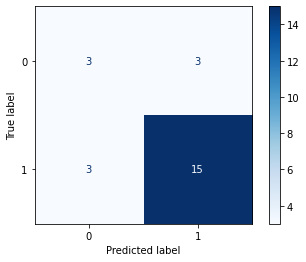

In [336]:
plot_confusion_matrix(final_dtrees, X_test_td, y_test_td,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

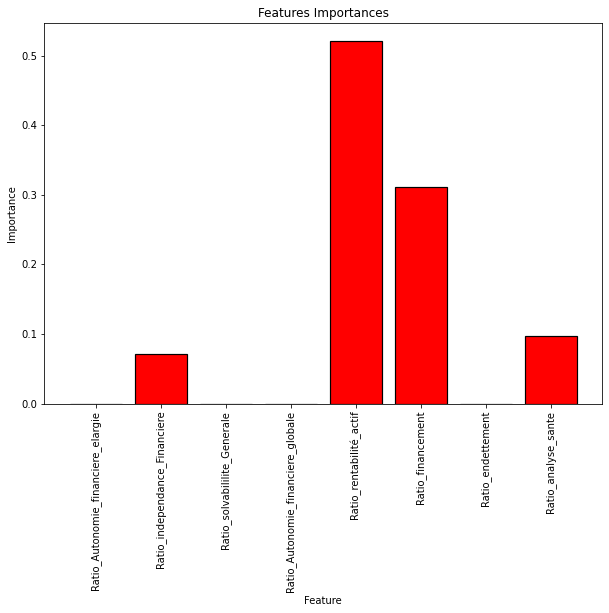

In [337]:
plt.figure(figsize=(10,7))
feature_list=X_train_td.columns
importances = list(final_dtrees.feature_importances_)
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

#### Select From Model 
Meta-transformer for selecting features based on importance weights.

In [338]:
trans = SelectFromModel(final_dtrees, threshold='median')
trans.fit_transform(X_train_td, y_train_td)
feature_support = trans.get_support()
td_feature = X_train_td.loc[:,feature_support].columns.tolist()


Feature Selected using Select From Model

In [339]:
td_feature

['Ratio_independance_Financiere',
 'Ratio_rentabilité_actif',
 'Ratio_financement',
 'Ratio_analyse_sante']

In [340]:
print("We started with {0} features but retained only {1} of them!".format(X_train_td.shape[1], len(td_feature)))

We started with 8 features but retained only 4 of them!


In [341]:
X_train_td = X_train_td[td_feature]
X_test_td = X_test_td[td_feature]
final_dtrees.fit(X_train_td, y_train_td)

DecisionTreeClassifier(max_depth=5)

Displaying the train score and the test score after feature selection

In [342]:
score_train_td = cross_val_score(final_dtrees, X_train_td,y_train_td, cv= 5, n_jobs=1, scoring='accuracy')
score_test_td = cross_val_score(final_dtrees, X_test_td,y_test_td, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_td))
print('accuarcy test score',np.mean(score_test_td))


accuarcy train score 0.7292397660818712
accuarcy test score 0.67


### Classification report

In [343]:
ypred =final_dtrees.predict(X_test_td)
print(classification_report(y_test_td, ypred))


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.83      0.83      0.83        18

    accuracy                           0.75        24
   macro avg       0.67      0.67      0.67        24
weighted avg       0.75      0.75      0.75        24



In [344]:
X_train_td.shape

(93, 4)

# <font color=purpuple>Random Forest</font>

Creating a copy of the train set and test set

In [425]:
X_train_rf,y_train_rf,X_test_rf,y_test_rf = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

In [346]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': np.arange(1,15),'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],}
grid=GridSearchCV( RandomForestClassifier(),param_grid,cv=5)
grid.fit(X_train_rf,y_train_rf)
grid.best_score_
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

Displaying the train score and the test score 

In [426]:
rf = RandomForestClassifier(criterion= 'gini', max_depth=5, max_features='auto',n_estimators= 200)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [427]:
score_train_rf = cross_val_score(rf, X_train_rf,y_train_rf, cv= 5, n_jobs=1, scoring='accuracy')
score_test_rf = cross_val_score(rf, X_test_rf,y_test_rf, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_rf))
print('accuarcy test score',np.mean(score_test_rf))

accuarcy train score 0.7941520467836257
accuarcy test score 0.79


### Classification report

In [428]:
ypred_rf=rf.predict(X_test_rf)
print(classification_report(y_test_rf,ypred_rf,digits=3))

              precision    recall  f1-score   support

           0      0.500     0.333     0.400         6
           1      0.800     0.889     0.842        18

    accuracy                          0.750        24
   macro avg      0.650     0.611     0.621        24
weighted avg      0.725     0.750     0.732        24



### Confusion matrix visualization

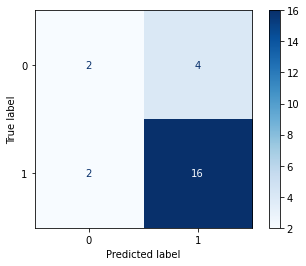

In [429]:
plot_confusion_matrix(rf, X_test_rf, y_test_rf,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

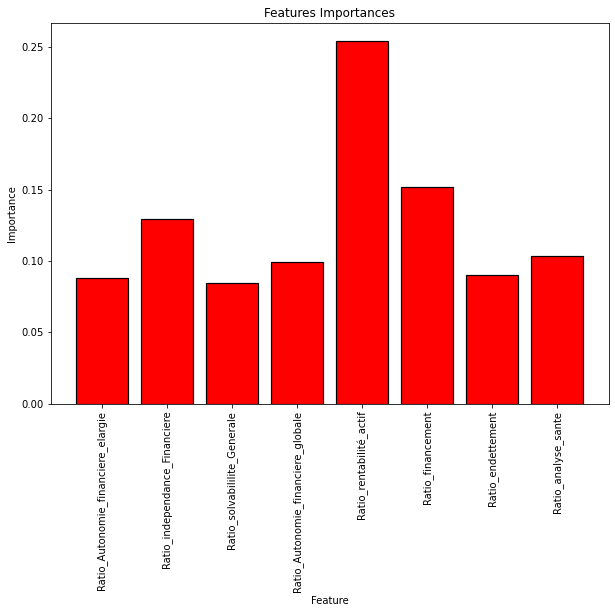

In [430]:
plt.figure(figsize=(10,7))
feature_list=X_train_rf.columns
importances = list(rf.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

Phone Service has the least importance 

### Feature Selection using RFECV

In [431]:
selector = RFECV(rf,
                 step=1,
                 min_features_to_select=5,
                 cv=5)
selector.fit(X_train_rf, y_train_rf)
print(selector.ranking_)
selector.grid_scores_

[3 1 2 1 1 1 1 1]


array([0.77309942, 0.78304094, 0.7625731 , 0.77251462])

In [432]:
feature_rf = selector .get_support()
rf_feature = X_train_rf.loc[:,feature_rf].columns.tolist()
print('Selected features :')
print(rf_feature)
print('The number of features selected : ', len(rf_feature))

Selected features :
['Ratio_independance_Financiere', 'Ratio_Autonomie_financiere_globale', 'Ratio_rentabilité_actif', 'Ratio_financement', 'Ratio_endettement', 'Ratio_analyse_sante']
The number of features selected :  6


In [435]:
X_train_rf=X_train_rf[rf_feature]
X_test_rf=X_test_rf[rf_feature]
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [436]:
score_train_rf = cross_val_score(rf, X_train_rf,y_train_rf, cv= 5, n_jobs=1, scoring='accuracy')
score_test_rf = cross_val_score(rf, X_test_rf,y_test_rf, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_rf))
print('accuarcy test score',np.mean(score_test_rf))

accuarcy train score 0.7941520467836257
accuarcy test score 0.71


### Classification report

In [437]:
ypred =rf.predict(X_test_rf)
print(classification_report(y_test_rf, ypred))


              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.84      0.89      0.86        18

    accuracy                           0.79        24
   macro avg       0.72      0.69      0.71        24
weighted avg       0.78      0.79      0.79        24



# <font color=purpuple>Standard SVM</font>

Creating a copy of the train set and test set

In [370]:
X_train_svm,y_train_svm,X_test_svm,y_test_svm = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [371]:
param_range =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}


grid = GridSearchCV(SVC(), param_grid, cv=5)

grid.fit(X_train_svm, y_train_svm)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

Display the best score

In [372]:
grid.best_score_

0.7520467836257311

Display best parameters

In [373]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

Creating the model and displaying the train score and the test score 

In [374]:
svm =SVC(C= 10, gamma= 1, kernel= 'rbf')
svm.fit(X_test_svm, y_test_svm)


SVC(C=10, gamma=1)

In [375]:
score_train_svm = cross_val_score(svm,X_train_svm,y_train_svm, cv= 5, n_jobs=1, scoring='accuracy')
score_test_svm = cross_val_score(svm, X_test_svm,y_test_svm, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_svm))
print('accuarcy test score',np.mean(score_test_svm))

accuarcy train score 0.7520467836257311
accuarcy test score 0.79


### Classification report

In [376]:
ypred=svm.predict(X_test_svm)
print(classification_report(y_test_svm,ypred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.833     0.909         6
           1      0.947     1.000     0.973        18

    accuracy                          0.958        24
   macro avg      0.974     0.917     0.941        24
weighted avg      0.961     0.958     0.957        24



### Confusion matrix visualization

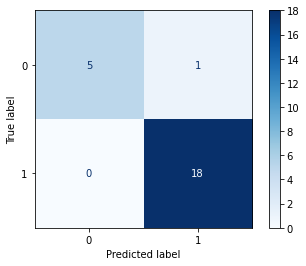

In [377]:
plot_confusion_matrix(svm, X_test_svm, y_test_svm,cmap=plt.cm.Blues)  
plt.show()

### Features Selection using Variance Threshold

In [378]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.97*(1-.97))
varsel=selector.fit(X_train_svm)
features=X_train_svm.loc[:, varsel.get_support()].columns.tolist()
print(features)

['Ratio_Autonomie_financiere_elargie', 'Ratio_independance_Financiere', 'Ratio_solvabililite_Generale', 'Ratio_Autonomie_financiere_globale', 'Ratio_rentabilité_actif', 'Ratio_financement', 'Ratio_endettement', 'Ratio_analyse_sante']


In [379]:
print('We started by ',X_train_svm.shape[1],' features and we selected ',len(features),' features')

We started by  8  features and we selected  8  features


# <font color=red>Comparing the performance of the models </font>

### Train score and Test Score for each model

In [438]:
# Compare Algorithms

models = []
models.append(('Gradient Boost', final_Gbc, X_train_Gboost, y_train_Gboost, X_test_Gboost, y_test_Gboost,test_score_gb,train_score_gb  ))
models.append(('xgBoost', xgboost, X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb,test_score_xgb,train_score_xgb))
models.append(('Ada Boost', ab, X_train_ada, y_train_ada, X_test_ada, y_test_ada,score_test_ada,score_train_ada ))
models.append(('Logistic Regression', finalLog, X_train_lr, y_train_lr, X_test_lr, y_test_lr,score_test_lr,score_train_lr ))
models.append(('KNN', knn, X_train_knn, y_train_knn, X_test_knn, y_test_knn ,score_test_knn,score_train_knn))
models.append(('Decision Tree', final_dtrees , X_train_td ,y_train_td ,X_test_td, y_test_td,score_test_td,score_train_td ))
models.append(('Random Forest', rf, X_train_rf, y_train_rf, X_test_rf, y_test_rf,score_test_rf,score_train_rf ))
#models.append(('Gaussian NB', model, X_train_nb, y_train_nb, X_test_nb, y_test_nb))
models.append(('SVM', svm, X_train_svm, y_train_svm, X_test_svm, y_test_svm,score_test_svm,score_train_svm ))

# evaluate each model in turn
train_scores = []
test_scores = []
names = []
ypreds = []
f1_scores = []
aucs = []
precisions = []
recalls = []


scoring = 'accuracy'
for name, mod, x_train, y_train, x_test, y_test,testscore, trainscore in models:
    ypred=mod.predict(x_test)
    ypreds.append(ypred)
    precisions.append(precision_score(y_test, ypred))
    recalls.append(recall_score(y_test, ypred))
    f1_scores.append(f1_score(ypred, y_test))
    test_scores.append(np.mean(testscore))
    train_scores.append(np.mean(trainscore))
    names.append(name)
    
 

In [439]:
train_df= pd.DataFrame({'Algorithms':names, 'Train Score':train_scores, 'Test Score':test_scores, 'Recall':recalls,
                        'Precision':precisions,'F1_score':f1_scores})
train_df

,Algorithms,Train Score,Test Score,Recall,Precision,F1_score
0,Gradient Boost,0.740351,0.79,0.833333,0.882353,0.857143
1,xgBoost,0.740936,0.63,0.833333,0.882353,0.857143
2,Ada Boost,0.740351,0.75,0.888889,0.888889,0.888889
3,Logistic Regression,0.720468,0.71,0.944444,0.739130,0.829268
4,KNN,0.750877,0.75,0.944444,0.809524,0.871795
5,Decision Tree,0.729240,0.67,0.833333,0.833333,0.833333
6,Random Forest,0.794152,0.71,0.888889,0.842105,0.864865
7,SVM,0.752047,0.79,1.000000,0.947368,0.972973


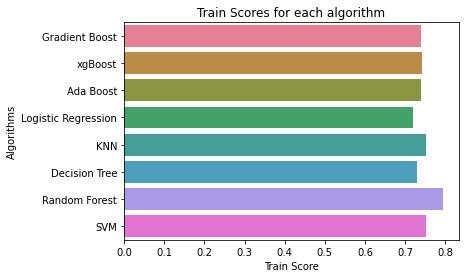

In [440]:
plot = sns.barplot("Train Score","Algorithms", data = train_df,
                palette="husl", orient = "h")

plot.set_xlabel("Train Score")
plot = plot.set_title("Train Scores for each algorithm")

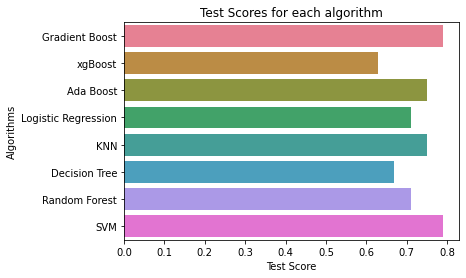

In [441]:
plot = sns.barplot("Test Score","Algorithms", data = train_df,
                palette="husl", orient = "h")

plot.set_xlabel("Test Score")
plot = plot.set_title("Test Scores for each algorithm")

### Roc Curve 

In [442]:
# Logistic regression

y_pred_prob_lr = finalLog.predict(X_test_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_lr, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test_lr, y_pred_prob_lr)

# Gradient Boost

y_pred_prob_Gboost = final_Gbc.predict(X_test_Gboost)
fpr_Gboost, tpr_Gboost, thresholds_Gboost = roc_curve(y_test_Gboost, y_pred_prob_Gboost)
roc_auc_Gboost = auc(fpr_Gboost, tpr_Gboost)
precision_Gboost, recall_Gboost, th_Gboost = precision_recall_curve(y_test_Gboost, y_pred_prob_Gboost)

# xgBoost

y_pred_prob_xgb = xgboost.predict(X_test_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_xgb, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test_xgb, y_pred_prob_xgb)

# Ada Boost

y_pred_prob_ada = ab.predict(X_test_ada)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test_ada, y_pred_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)
precision_ada, recall_ada, th_ada = precision_recall_curve(y_test_ada, y_pred_prob_ada)

# SVM 

y_pred_prob_SVM =svm.predict(X_test_svm)
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test_svm, y_pred_prob_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
precision_SVM, recall_SVM, th_SVM = precision_recall_curve(y_test_svm, y_pred_prob_SVM)


# KNN

y_pred_prob_KNN = knn.predict(X_test_knn)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test_knn, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test_knn, y_pred_prob_KNN)

# Decision Tree

y_pred_prob_td = final_dtrees.predict(X_test_td)
fpr_td, tpr_td, thresholds_td = roc_curve(y_test_td, y_pred_prob_td)
roc_auc_td = auc(fpr_td, tpr_td)
precision_td, recall_td, th_td = precision_recall_curve(y_test_td, y_pred_prob_td)

# Random forest

y_pred_prob_rf = rf.predict(X_test_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test_rf, y_pred_prob_rf)




### Roc Curves For each model

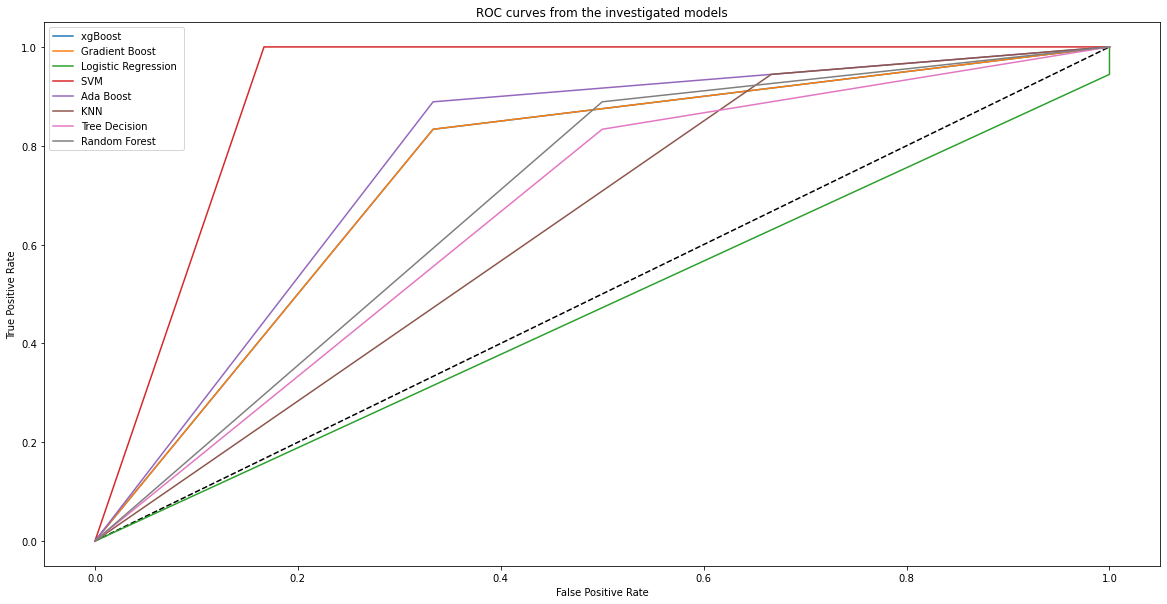

In [443]:
# Plot ROC curve
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='xgBoost ' % roc_auc_xgb)
plt.plot(fpr_Gboost, tpr_Gboost, label='Gradient Boost ' % roc_auc_Gboost)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression ' % roc_auc_lr)
plt.plot(fpr_SVM, tpr_SVM, label='SVM ' % roc_auc_SVM)
plt.plot(fpr_ada, tpr_ada, label='Ada Boost ' % roc_auc_ada)
plt.plot(fpr_KNN, tpr_KNN, label='KNN ' % roc_auc_KNN)
plt.plot(fpr_td, tpr_td, label='Tree Decision ' % roc_auc_td)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ' % roc_auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

### Precision vs Recall

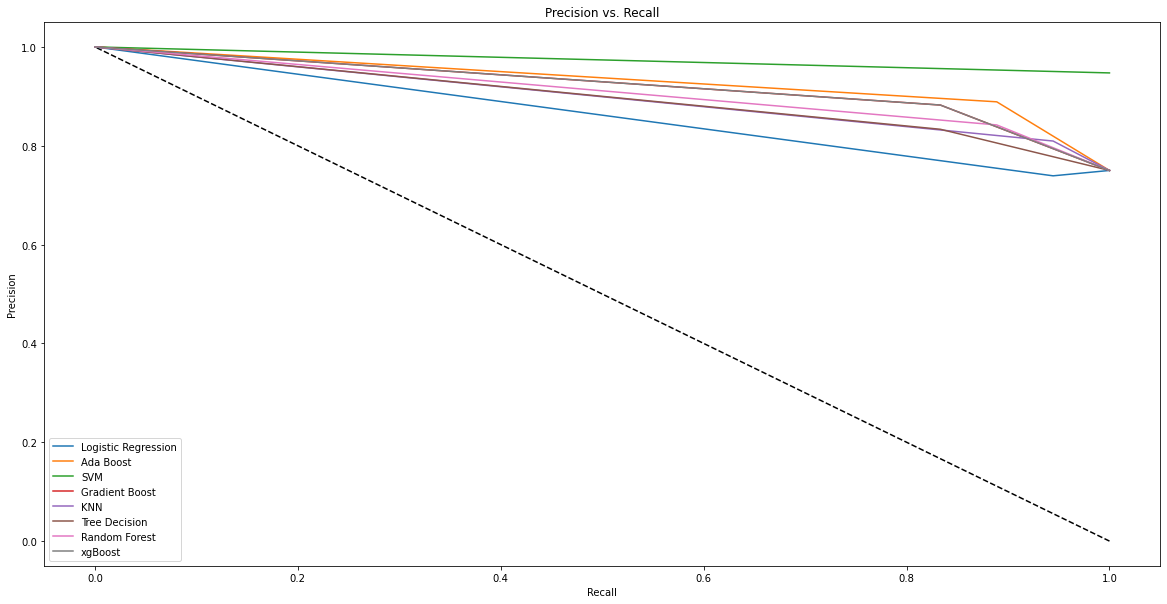

In [444]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_ada, precision_ada, label='Ada Boost')
plt.plot(recall_SVM, precision_SVM, label='SVM')
plt.plot(recall_Gboost, precision_Gboost, label='Gradient Boost')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_td, precision_td, label='Tree Decision')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, label='xgBoost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

 # <font color=darkblue>Second Case : Test With Extracted Data</font> 

### Splitting the data into training and test sets

In [445]:
modeling_Dataset2.columns

Index(['TCPP', 'CapitalPropre', 'PassifNonC', 'TActif', 'TPassif',
       'PassifCourant', 'ActifNonC', 'ActifCourant', 'Reserves',
       'CapitalSociale', 'TProdExploitation', 'TChargeExploitation',
       'R_Exploitation', 'Res_Exsercice', 'ActiviteOrdinaire', 'Dotation',
       'TDebut', 'TFin', 'Variation', 'y'],
      dtype='object')

In [446]:
y = modeling_Dataset2.iloc[:,19]
X = modeling_Dataset2.iloc[:,0:19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### Data Standardisation

Standardization refers to shifting the distribution of each attribute to have a mean of 0 and a standard deviation of 1.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.
the estimators might behave badly if the individual features do not more or less look like standard normally distributed data

Standardisation with StandardScaler

In [447]:
features =  ['TCPP', 'CapitalPropre', 'PassifNonC', 'TActif',
       'TPassif', 'PassifCourant', 'ActifNonC', 'ActifCourant', 'Reserves',
       'CapitalSociale', 'TProdExploitation', 'TChargeExploitation',
       'R_Exploitation', 'Res_Exsercice', 'ActiviteOrdinaire', 'Dotation','TDebut','TFin', 'Variation']
scaler=StandardScaler()
X_train[features]=scaler.fit_transform(X_train[features])
X_test[features]=scaler.transform(X_test[features])

StandardScaler standardize the features by removing the mean and scaling to unit variance

# <font color=red>Modeling and Evaluation  </font>

# <font color=purpuple>Gradient Boost Classifier</font>


Creating a copy of the train set and test set 

In [757]:
X_train_Gboost,y_train_Gboost,X_test_Gboost,y_test_Gboost= X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [735]:
Gbc=GradientBoostingClassifier(n_estimators=100)

param_grid={'loss' : ['deviance', 'exponential'],
            'criterion' : ['friedman_mse', 'mse', 'mae'],
            'max_features' : ['auto', 'sqrt', 'log2']}
grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=2)
grid.fit(X_train_Gboost, y_train_Gboost)
grid.best_score_
grid.best_params_

{'criterion': 'mae', 'loss': 'exponential', 'max_features': 'log2'}

Creating the model using the best parameters for Gradient Boosting Classifier

In [758]:
final_Gbc=GradientBoostingClassifier(criterion= 'mae', loss= 'exponential', max_features= 'log2')
final_Gbc.fit(X_train_Gboost, y_train_Gboost)

GradientBoostingClassifier(criterion='mae', loss='exponential',
                           max_features='log2')

Displaying the train score and the test score 

In [759]:
train_score_gb = cross_val_score(final_Gbc,X_train_Gboost,y_train_Gboost, cv= 5, n_jobs=1, scoring='accuracy')
test_score_gb = cross_val_score(final_Gbc,X_test_Gboost,y_test_Gboost, cv= 5, n_jobs=1, scoring='accuracy')
print('accuarcy train score',np.mean(train_score_gb ))
print('accuarcy test score',np.mean(test_score_gb))



accuarcy train score 0.8058479532163743
accuarcy test score 0.75


### Classification report

In [760]:
ypred1 =final_Gbc.predict(X_test_Gboost)
print(classification_report(y_test_Gboost, ypred1))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.84      0.89      0.86        18

    accuracy                           0.79        24
   macro avg       0.72      0.69      0.71        24
weighted avg       0.78      0.79      0.79        24



### Confusion matrix visualization

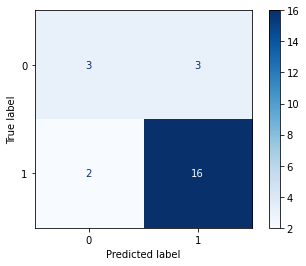

In [761]:
plot_confusion_matrix(final_Gbc, X_test_Gboost, y_test_Gboost,cmap=plt.cm.Blues)  
plt.show()


### Features importance visualization

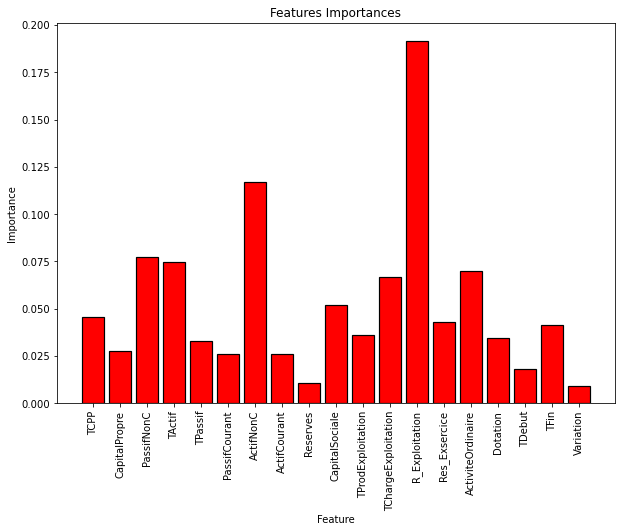

In [762]:
plt.figure(figsize=(10,7))
feature_list=X_train_Gboost.columns
importances = list(final_Gbc.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

### Feature Selection using RFECV

In [763]:
selector = RFECV(final_Gbc,
                 step=1,
                 min_features_to_select=9,
                 cv=5)
selector.fit(X_train_Gboost, y_train_Gboost)
selector.grid_scores_
selector.ranking_

array([1, 3, 1, 1, 5, 1, 1, 1, 8, 1, 4, 1, 1, 1, 1, 2, 1, 6, 7])

This array gave us the ranking of each features. The feature having rank 1 have high importance 

Display Selected features

In [764]:
feature_support = selector.get_support()
gb_feature = X_train_Gboost.loc[:,feature_support].columns.tolist()
gb_feature

['TCPP',
 'PassifNonC',
 'TActif',
 'PassifCourant',
 'ActifNonC',
 'ActifCourant',
 'CapitalSociale',
 'TChargeExploitation',
 'R_Exploitation',
 'Res_Exsercice',
 'ActiviteOrdinaire',
 'TDebut']

In [765]:
X_train_Gboost=X_train_Gboost[gb_feature]
X_test_Gboost=X_test_Gboost[gb_feature]
final_Gbc.fit(X_train_Gboost,y_train_Gboost)

GradientBoostingClassifier(criterion='mae', loss='exponential',
                           max_features='log2')

In [766]:
X_train_Gboost.shape

(93, 12)

Displaying the train score and the test score after feature selection

In [767]:
print('scores after removing Device protection feature')
train_score_gb = cross_val_score(final_Gbc,X_train_Gboost,y_train_Gboost, cv= 5, n_jobs=1, scoring='accuracy')
test_score_gb = cross_val_score(final_Gbc,X_test_Gboost,y_test_Gboost, cv= 5, n_jobs=1, scoring='accuracy')
print('accuarcy train score',np.mean(train_score_gb ))
print('accuarcy test score',np.mean(test_score_gb))

scores after removing Device protection feature
accuarcy train score 0.8163742690058479
accuarcy test score 0.75


### Classification report after feature selection

In [768]:
ypred =final_Gbc.predict(X_test_Gboost)
print(classification_report(y_test_Gboost, ypred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.88      0.83      0.86        18

    accuracy                           0.79        24
   macro avg       0.73      0.75      0.74        24
weighted avg       0.80      0.79      0.80        24



# <font color=purpuple>xgBoost </font>


Creating a copy of the train set and test set

In [785]:
X_train_xgb,y_train_xgb,X_test_xgb,y_test_xgb = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [508]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train_xgb,y_train_xgb)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    7.0s


[01:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:   10.0s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=Non

Display best parameters

In [770]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Display best score (scoring = 'roc_auc' )

Creating the model using the best parameters

In [786]:
xgboost=XGBClassifier(
    learning_rate= 0.01 ,n_estimators= 100,max_depth= 3
)
xgboost.fit(X_train_xgb, y_train_xgb)

[02:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Displaying the train score and the test score 

In [787]:
train_score_xgb = cross_val_score( xgboost,X_train_xgb,y_train_xgb, cv= 5, n_jobs=1, scoring='accuracy')
test_score_xgb = cross_val_score(xgboost,X_test_xgb,y_test_xgb, cv= 5, n_jobs=1, scoring='accuracy')



[02:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [788]:
print('accuarcy train score',np.mean(train_score_xgb ))
print('accuarcy test score',np.mean(test_score_xgb))


accuarcy train score 0.7742690058479533
accuarcy test score 0.75


### Classification report

In [789]:
ypred =xgboost.predict(X_test_xgb)
print(classification_report(y_test_xgb, ypred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.88      0.83      0.86        18

    accuracy                           0.79        24
   macro avg       0.73      0.75      0.74        24
weighted avg       0.80      0.79      0.80        24



### Confusion matrix visualization

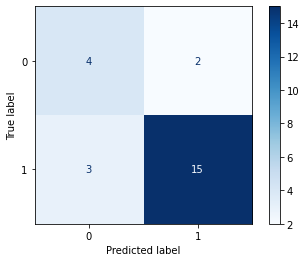

In [790]:
plot_confusion_matrix(xgboost, X_test_xgb, y_test_xgb,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

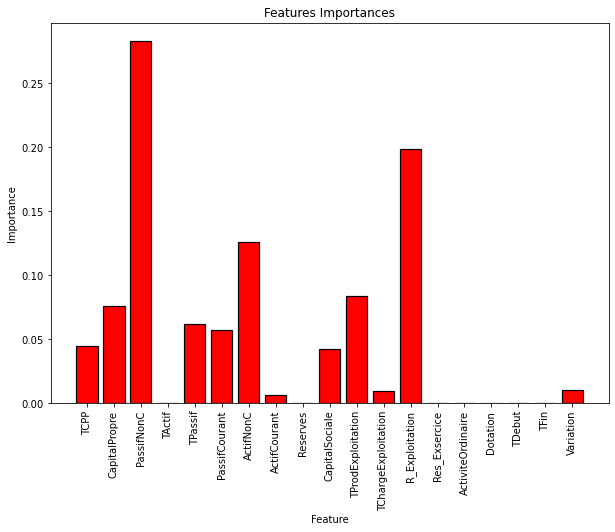

In [776]:
plt.figure(figsize=(10,7))
feature_list=X_train_xgb.columns
importances = list(xgboost.feature_importances_)
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

### Feature Selection using RFECV

In [777]:
rfecv = RFECV(xgboost,step=1,
                 min_features_to_select=5,
                 cv=5)
rfecv.fit(X_train_xgb, y_train_xgb)

[02:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RFECV(cv=5,
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.01,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=8, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None),
      min_features_to_select=5)

In [778]:
rfecv.ranking_

array([ 2,  1,  1, 12,  3,  4,  1,  8, 14,  5,  1,  7,  1, 11, 10, 13, 15,
        9,  6])

Display the selected features

In [779]:
feature_xgb = rfecv.get_support()
xgb_feature = X_train_xgb.loc[:,feature_xgb].columns.tolist()
print('Selected features :')
print(xgb_feature)
print('The number of features selected : ', len(xgb_feature))

Selected features :
['CapitalPropre', 'PassifNonC', 'ActifNonC', 'TProdExploitation', 'R_Exploitation']
The number of features selected :  5


In [780]:
X_train_xgb=X_train_xgb[xgb_feature]
X_test_xgb=X_test_xgb[xgb_feature]
xgboost.fit(X_train_xgb,y_train_xgb)

[02:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [781]:
X_train_xgb.shape

(93, 5)

Displaying the train score and the test score after feature selection

In [782]:
print('scores after removing Device protection feature')
train_score_xgb = cross_val_score( xgboost,X_train_xgb,y_train_xgb, cv= 5, n_jobs=1, scoring='accuracy')
test_score_xgb = cross_val_score(xgboost,X_test_xgb,y_test_xgb, cv= 5, n_jobs=1, scoring='accuracy')


scores after removing Device protection feature
[02:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:51:07] WARNING: C:

In [783]:

print('accuarcy train score',np.mean(train_score_xgb ))
print('accuarcy test score',np.mean(test_score_xgb))


accuarcy train score 0.8707602339181287
accuarcy test score 0.67


### Classification report after feature selection

In [784]:
ypred =xgboost.predict(X_test_xgb)
print(classification_report(y_test_xgb, ypred))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.88      0.83      0.86        18

    accuracy                           0.79        24
   macro avg       0.73      0.75      0.74        24
weighted avg       0.80      0.79      0.80        24



## Note:
After the feature selection with RFECV the test score decrease a lot so we are not going to use this selection !

# <font color=purpuple>Ada Boost </font>


Creating a copy of the train set and test set

In [532]:
X_train_ada,y_train_ada,X_test_ada,y_test_ada = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [533]:
ada_classifier = AdaBoostClassifier(random_state=42)

param_grid =  {'n_estimators':[500, 1000, 1500, 2000], 
              'learning_rate':[0.05, 0.1, 0.15, 0.2]}
grid=GridSearchCV( ada_classifier,param_grid,cv=5)
grid.fit(X_train_ada, y_train_ada)
grid.best_params_


{'learning_rate': 0.05, 'n_estimators': 1500}

In [534]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.05, n_estimators=1500, random_state=42)

Creating the model 

In [535]:
ab = AdaBoostClassifier(learning_rate=0.05, n_estimators=1500, random_state=42)
ab.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(learning_rate=0.05, n_estimators=1500, random_state=42)

##### Cross Validation

In [536]:
score_train_ada = cross_val_score(ab, X_train_ada,y_train_ada, cv= 5, n_jobs=1, scoring='accuracy')
score_test_ada = cross_val_score(ab, X_test_ada,y_test_ada, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_ada))
print('accuarcy test score',np.mean(score_test_ada))

accuarcy train score 0.8175438596491228
accuarcy test score 0.62


### Classification report

In [537]:
ypred=ab.predict(X_test_ada)
print(classification_report(y_test_ada,ypred,digits=8))

              precision    recall  f1-score   support

           0  0.66666667 0.33333333 0.44444444         6
           1  0.80952381 0.94444444 0.87179487        18

    accuracy                      0.79166667        24
   macro avg  0.73809524 0.63888889 0.65811966        24
weighted avg  0.77380952 0.79166667 0.76495726        24



### Confusion matrix visualization

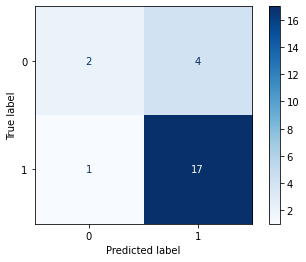

In [538]:
plot_confusion_matrix(ab, X_test_ada, y_test_ada,cmap=plt.cm.Blues)  
plt.show()

### Feature Selection using RFECV

In [539]:
selector = RFECV(ab,
                 step=1,
                 min_features_to_select=5,
                 cv=5)
selector.fit(X_train_ada, y_train_ada)
print(selector.ranking_)
selector.grid_scores_

[ 7 11  3  1  6  1  1 12  5  2  1  1  1  1 10  9  4  8  1]


array([0.78654971, 0.79707602, 0.79707602, 0.81871345, 0.79649123,
       0.79707602, 0.78596491, 0.79649123, 0.80643275, 0.80643275,
       0.78538012, 0.80701754, 0.80701754, 0.81754386, 0.81754386])

Display selected features

In [540]:
feature_support = selector.get_support()
ada_feature = X_train_ada.loc[:,feature_support].columns.tolist()
ada_feature

['TActif',
 'PassifCourant',
 'ActifNonC',
 'TProdExploitation',
 'TChargeExploitation',
 'R_Exploitation',
 'Res_Exsercice',
 'Variation']

In [545]:
X_train_ada=X_train_ada[ada_feature]
X_test_ada=X_test_ada[ada_feature]
ab.fit(X_train_ada,y_train_ada)

AdaBoostClassifier(learning_rate=0.2, n_estimators=500, random_state=42)

In [546]:
X_train_ada.shape

(93, 8)

Displaying the train score and the test score after feature selection

In [547]:
score_train_ada = cross_val_score(ab, X_train_ada,y_train_ada, cv= 5, n_jobs=1, scoring='accuracy')
score_test_ada = cross_val_score(ab, X_test_ada,y_test_ada, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_ada))
print('accuarcy test score',np.mean(score_test_ada))

accuarcy train score 0.8292397660818713
accuarcy test score 0.7100000000000001


In [548]:
ypred=ab.predict(X_test_ada)
print(classification_report(y_test_ada,ypred,digits=8))

              precision    recall  f1-score   support

           0  0.66666667 0.33333333 0.44444444         6
           1  0.80952381 0.94444444 0.87179487        18

    accuracy                      0.79166667        24
   macro avg  0.73809524 0.63888889 0.65811966        24
weighted avg  0.77380952 0.79166667 0.76495726        24



# <font color=purpuple>Logitic Regression </font>

Creating a copy of the train set and test set

In [549]:
X_train_lr,y_train_lr,X_test_lr,y_test_lr = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [550]:

param_grid=[{'penalty': ['l1','l2'], 
            'solver' : ['lbfgs', 'liblinear','newton-cg', 'sag', 'saga']}
           ]
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train_lr, y_train_lr)
grid.best_score_

0.7631578947368421

In [551]:
grid.best_params_


{'penalty': 'l1', 'solver': 'liblinear'}

Creating the model

In [552]:
finalLog=LogisticRegression(penalty='l1',solver= 'liblinear')
finalLog.fit(X_train_lr, y_train_lr)

LogisticRegression(penalty='l1', solver='liblinear')

Displaying the train score and the test score 

In [553]:
score_train_lr = cross_val_score(finalLog, X_train_lr,y_train_lr, cv= 5, n_jobs=1, scoring='accuracy')
score_test_lr = cross_val_score(finalLog, X_test_lr,y_test_lr, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_lr))
print('accuarcy test score',np.mean(score_test_lr))

accuarcy train score 0.7631578947368421
accuarcy test score 0.79


### Classification report

In [554]:
ypred =finalLog.predict(X_test_lr)
print(classification_report(y_test_lr, ypred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.85      0.94      0.89        18

    accuracy                           0.83        24
   macro avg       0.80      0.72      0.75        24
weighted avg       0.82      0.83      0.82        24



### Confusion matrix visualization

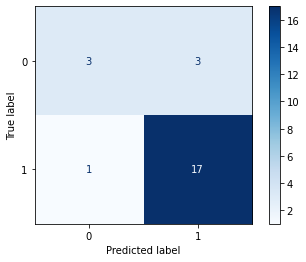

In [555]:
plot_confusion_matrix(finalLog, X_test_lr, y_test_lr,cmap=plt.cm.Blues)  
plt.show()

### Feature Selection using RFECV

In [556]:
selector = RFECV(finalLog,
                 step=1,
                 min_features_to_select=5,
                 cv=10)
selector.fit(X_train_lr, y_train_lr)
selector.ranking_


array([15, 14, 13, 12, 11, 10,  1,  9,  8,  1,  3,  2,  1,  1,  4,  1,  7,
        6,  5])

Display feature selected

In [557]:
feature_support = selector.get_support()
lr_feature = X_train_lr.loc[:,feature_support].columns.tolist()
lr_feature

['ActifNonC', 'CapitalSociale', 'R_Exploitation', 'Res_Exsercice', 'Dotation']

In [558]:
X_train_lr=X_train_lr[lr_feature]
X_test_lr=X_test_lr[lr_feature]
finalLog.fit(X_train_lr,y_train_lr)

LogisticRegression(penalty='l1', solver='liblinear')

In [559]:
X_train_lr.shape

(93, 5)

Displaying the train score and the test score after feature selection

In [560]:
score_train_lr = cross_val_score(finalLog, X_train_lr,y_train_lr, cv= 5, n_jobs=1, scoring='accuracy')
score_test_lr = cross_val_score(finalLog, X_test_lr,y_test_lr, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_lr))
print('accuarcy test score',np.mean(score_test_lr))

accuarcy train score 0.7631578947368421
accuarcy test score 0.8300000000000001


In [561]:
ypred =finalLog.predict(X_test_lr)
print(classification_report(y_test_lr, ypred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.85      0.94      0.89        18

    accuracy                           0.83        24
   macro avg       0.80      0.72      0.75        24
weighted avg       0.82      0.83      0.82        24



# <font color=purpuple>KNN</font>


Creating a copy of the train set and test set

In [562]:
X_train_knn,y_train_knn,X_test_knn,y_test_knn = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [563]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan'],
              'weights' : ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train_knn, y_train_knn)
print(grid.best_score_)
print(grid.best_params_)
model = grid.best_estimator_
model.score(X_test_knn, y_test_knn)


0.8485380116959066
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


0.9166666666666666

In [564]:
knn=KNeighborsClassifier(metric ='euclidean', n_neighbors= 1, weights= 'uniform')
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [565]:
score_train_knn = cross_val_score(knn, X_train_knn,y_train_knn, cv= 5, n_jobs=1, scoring='accuracy')
score_test_knn = cross_val_score(knn, X_test_knn,y_test_knn, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_knn))
print('accuarcy test score',np.mean(score_test_knn))

accuarcy train score 0.72046783625731
accuarcy test score 0.7100000000000001


### Classification report 

In [566]:
ypred =knn.predict(X_test_knn)
print(classification_report(y_test_knn, ypred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.80      0.89      0.84        18

    accuracy                           0.75        24
   macro avg       0.65      0.61      0.62        24
weighted avg       0.72      0.75      0.73        24



### Confusion matrix visualization

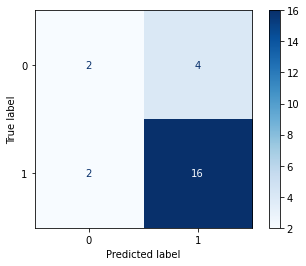

In [567]:
plot_confusion_matrix(knn, X_test_knn, y_test_knn,cmap=plt.cm.Blues)  
plt.show()

In [568]:
new=pd.concat([X_train_knn, y_train_knn],axis=1)

### Feature Selection

#### Correlation Matrix

A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.

Each row and column represents a variable, and each value in this matrix is the correlation coefficient between the variables represented by the corresponding row and column.

The Correlation matrix is an important metric that is computed to summarize data to understand the relationship between various variables and make decisions accordingly.

And we are going to use it to reduce the dimension of our dataset (features selection)

Text(0.5, 1.0, 'Correlation matrix')

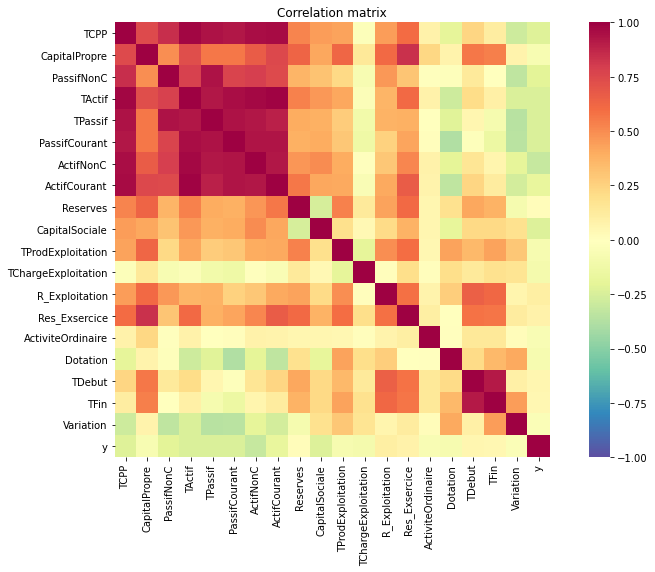

In [569]:
f, ax = plt.subplots(figsize=(14, 8))
corr1= new.corr()


sns.heatmap(corr1,cmap='Spectral_r',  square=True, vmin=-1 ,vmax=1, ax=ax)
plt.title('Correlation matrix')

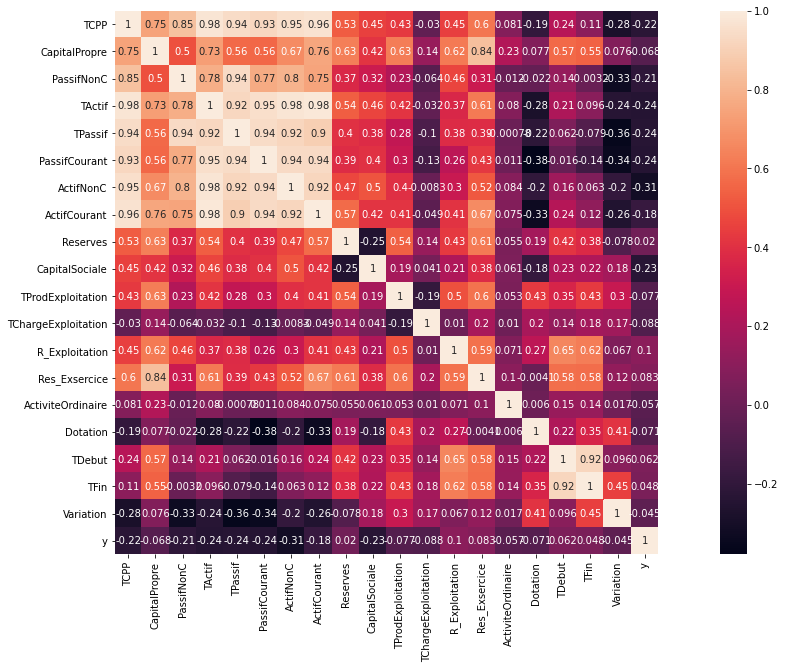

In [570]:
import seaborn as sns

f, ax = plt.subplots(figsize=(22, 10))
corr = new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            square=True, annot=True, ax=ax)

In [571]:
corr = new.corr()
corr

,TCPP,CapitalPropre,PassifNonC,TActif,TPassif,PassifCourant,ActifNonC,ActifCourant,Reserves,CapitalSociale,TProdExploitation,TChargeExploitation,R_Exploitation,Res_Exsercice,ActiviteOrdinaire,Dotation,TDebut,TFin,Variation,y
TCPP,1.000000,0.746519,0.846771,0.978085,0.944439,0.928980,0.954761,0.963604,0.526820,0.452473,0.433594,-0.029840,0.448458,0.604642,0.081443,-0.191966,0.241996,0.110400,-0.283704,-0.223883
CapitalPropre,0.746519,1.000000,0.497996,0.729953,0.564202,0.562512,0.667643,0.755272,0.633176,0.416211,0.626747,0.141776,0.615063,0.842958,0.228848,0.076723,0.565977,0.545060,0.076296,-0.067930
PassifNonC,0.846771,0.497996,1.000000,0.782662,0.939214,0.769572,0.796669,0.748305,0.373024,0.315296,0.226050,-0.064171,0.462276,0.305141,-0.012294,-0.022314,0.135065,-0.003155,-0.329180,-0.207744
TActif,0.978085,0.729953,0.782662,1.000000,0.924587,0.954746,0.975648,0.984750,0.535418,0.464467,0.415342,-0.031632,0.368634,0.614335,0.080251,-0.282390,0.207962,0.095814,-0.235847,-0.240562
TPassif,0.944439,0.564202,0.939214,0.924587,1.000000,0.942010,0.922604,0.896089,0.404411,0.382961,0.279536,-0.103207,0.380997,0.389223,-0.000779,-0.215541,0.062171,-0.079451,-0.358129,-0.238474
PassifCourant,0.928980,0.562512,0.769572,0.954746,0.942010,1.000000,0.937299,0.935386,0.387106,0.404505,0.299205,-0.129409,0.256568,0.425408,0.010529,-0.379431,-0.016453,-0.144794,-0.344349,-0.240516
ActifNonC,0.954761,0.667643,0.796669,0.975648,0.922604,0.937299,1.000000,0.922976,0.469914,0.504728,0.400588,-0.008317,0.302206,0.518409,0.084414,-0.199447,0.160801,0.063064,-0.195186,-0.310699
ActifCourant,0.963604,0.755272,0.748305,0.984750,0.896089,0.935386,0.922976,1.000000,0.569523,0.416347,0.413660,-0.048570,0.411922,0.669229,0.074660,-0.334665,0.239575,0.119606,-0.259744,-0.175692
Reserves,0.526820,0.633176,0.373024,0.535418,0.404411,0.387106,0.469914,0.569523,1.000000,-0.253834,0.537800,0.139142,0.432259,0.612630,0.054878,0.185638,0.417670,0.378133,-0.078375,0.020211
CapitalSociale,0.452473,0.416211,0.315296,0.464467,0.382961,0.404505,0.504728,0.416347,-0.253834,1.000000,0.190963,0.040651,0.214734,0.381841,0.060732,-0.180281,0.225071,0.222804,0.181525,-0.228802


We are going to use the last row of our dataset which represent the target and we will try to filter out those feature whose correlation coefficient value with the target are greater than a threshold that we will determine later.

In [572]:
C=corr.tail(1)

In [573]:
listdict=C.to_dict('records')  
listdict

[{'TCPP': -0.22388296041842481,
  'CapitalPropre': -0.06792950554476482,
  'PassifNonC': -0.20774352007837538,
  'TActif': -0.24056219407543597,
  'TPassif': -0.23847415840285613,
  'PassifCourant': -0.24051607349361967,
  'ActifNonC': -0.3106985654775607,
  'ActifCourant': -0.17569162315208098,
  'Reserves': 0.020210770000760433,
  'CapitalSociale': -0.22880221797843492,
  'TProdExploitation': -0.07739794737320466,
  'TChargeExploitation': -0.08823851220320318,
  'R_Exploitation': 0.10266615360082425,
  'Res_Exsercice': 0.08294723633158038,
  'ActiviteOrdinaire': -0.057394209588132544,
  'Dotation': -0.07116162620326487,
  'TDebut': 0.062197339023661743,
  'TFin': 0.04818143234524249,
  'Variation': -0.04486077221682272,
  'y': 1.0}]

In [574]:
for l in listdict:
    l.pop('y')

In [575]:
listdict

[{'TCPP': -0.22388296041842481,
  'CapitalPropre': -0.06792950554476482,
  'PassifNonC': -0.20774352007837538,
  'TActif': -0.24056219407543597,
  'TPassif': -0.23847415840285613,
  'PassifCourant': -0.24051607349361967,
  'ActifNonC': -0.3106985654775607,
  'ActifCourant': -0.17569162315208098,
  'Reserves': 0.020210770000760433,
  'CapitalSociale': -0.22880221797843492,
  'TProdExploitation': -0.07739794737320466,
  'TChargeExploitation': -0.08823851220320318,
  'R_Exploitation': 0.10266615360082425,
  'Res_Exsercice': 0.08294723633158038,
  'ActiviteOrdinaire': -0.057394209588132544,
  'Dotation': -0.07116162620326487,
  'TDebut': 0.062197339023661743,
  'TFin': 0.04818143234524249,
  'Variation': -0.04486077221682272}]

In a range of [0,1] we will increase the threshold with 0.01 and we will compare it with the corrolation coffecient of each feature and to finally show the train score and test score using those thresholds.

In [576]:
LbestTr=[]
LbestTest=[]
d={}
d2={}
for seuil in np.arange(0,1,0.01):
    Ll=[]
    
    for l in listdict:
        for k,v in l.items():
            if abs(v)  >seuil:  
                Ll.append(k)
                
                Xtr=X_train[Ll]
                Xt=X_test[Ll]
               
                knn.fit(Xtr,y_train_knn)
                
    score_train_knn = cross_val_score(knn, Xtr,y_train_knn, cv= 5, n_jobs=1, scoring='accuracy')
    score_test_knn = cross_val_score(knn, Xt,y_test_knn, cv= 5, n_jobs=1, scoring='accuracy')

    print('accuarcy train score',np.mean(score_train_knn))
    print('accuarcy test score',np.mean(score_test_knn))

            
    print('seuil ', seuil,'\n')
    print('L ', Ll,'\n',len(Ll))

    
    
    LbestTr.append(np.mean(score_train_knn))
   
    LbestTest.append(np.mean(score_test_knn))
    
    #d={seuil: Lbest}
    #d={seuil:knn.score(Xtr,y_train_knn)}
    d.update({seuil:np.mean(score_train_knn)})
    d2.update({seuil:np.mean(score_test_knn)})
   

accuarcy train score 0.72046783625731
accuarcy test score 0.7100000000000001
seuil  0.0 

L  ['TCPP', 'CapitalPropre', 'PassifNonC', 'TActif', 'TPassif', 'PassifCourant', 'ActifNonC', 'ActifCourant', 'Reserves', 'CapitalSociale', 'TProdExploitation', 'TChargeExploitation', 'R_Exploitation', 'Res_Exsercice', 'ActiviteOrdinaire', 'Dotation', 'TDebut', 'TFin', 'Variation'] 
 19
accuarcy train score 0.72046783625731
accuarcy test score 0.7100000000000001
seuil  0.01 

L  ['TCPP', 'CapitalPropre', 'PassifNonC', 'TActif', 'TPassif', 'PassifCourant', 'ActifNonC', 'ActifCourant', 'Reserves', 'CapitalSociale', 'TProdExploitation', 'TChargeExploitation', 'R_Exploitation', 'Res_Exsercice', 'ActiviteOrdinaire', 'Dotation', 'TDebut', 'TFin', 'Variation'] 
 19
accuarcy train score 0.72046783625731
accuarcy test score 0.7100000000000001
seuil  0.02 

L  ['TCPP', 'CapitalPropre', 'PassifNonC', 'TActif', 'TPassif', 'PassifCourant', 'ActifNonC', 'ActifCourant', 'Reserves', 'CapitalSociale', 'TProdExploi

In [577]:
max(LbestTest)

0.7100000000000001

In [578]:
max(LbestTr)

0.8163742690058479

In [579]:
# threshold for max train
max(d, key=d.get)

0.23

In [580]:
# threshold for max test
max(d2, key=d2.get)

0.0

In [581]:
Best_f= ['TActif', 'TPassif', 'PassifCourant', 'ActifNonC']
X_train_knn=X_train_knn[Best_f]
X_test_knn=X_test_knn[Best_f]

In [582]:
X_test_knn.shape

(24, 4)

In [583]:
X_train_knn.shape

(93, 4)

In [584]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [585]:
score_train_knn = cross_val_score(knn, X_train_knn,y_train_knn, cv= 5, n_jobs=1, scoring='accuracy')
score_test_knn = cross_val_score(knn, X_test_knn,y_test_knn, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_knn))
print('accuarcy test score',np.mean(score_test_knn))

accuarcy train score 0.8163742690058479
accuarcy test score 0.7


### Classification report after feature selection

In [586]:
ypred =knn.predict(X_test_knn)
print(classification_report(y_test_knn, ypred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.88      0.78      0.82        18

    accuracy                           0.75        24
   macro avg       0.69      0.72      0.70        24
weighted avg       0.78      0.75      0.76        24



# <font color=purpuple>Tree Decision</font>

Creating a copy of the train set and test set

In [605]:
X_train_td,y_train_td,X_test_td,y_test_td = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [606]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': np.arange(1,50)}
grid=GridSearchCV( DecisionTreeClassifier(random_state=0),param_grid,cv=5)
grid.fit(X_train_td, y_train_td)
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

Creating the model

In [607]:
final_dtrees=DecisionTreeClassifier(criterion='gini', max_depth= 3)
final_dtrees.fit(X_train_td, y_train_td)

DecisionTreeClassifier(max_depth=3)

Displaying the train score and the test score 

In [608]:
score_train_td = cross_val_score(final_dtrees, X_train_td,y_train_td, cv= 5, n_jobs=1, scoring='accuracy')
score_test_td = cross_val_score(final_dtrees, X_test_td,y_test_td, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_td))
print('accuarcy test score',np.mean(score_test_td))

accuarcy train score 0.8175438596491228
accuarcy test score 0.63


### Classification report

In [609]:
ypred =final_dtrees.predict(X_test_td)
print(classification_report(y_test_td, ypred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.80      0.89      0.84        18

    accuracy                           0.75        24
   macro avg       0.65      0.61      0.62        24
weighted avg       0.72      0.75      0.73        24



### Confusion matrix visualization

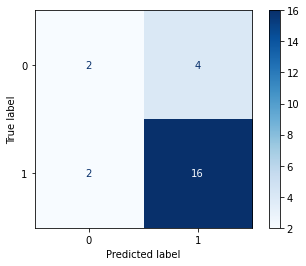

In [610]:
plot_confusion_matrix(final_dtrees, X_test_td, y_test_td,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

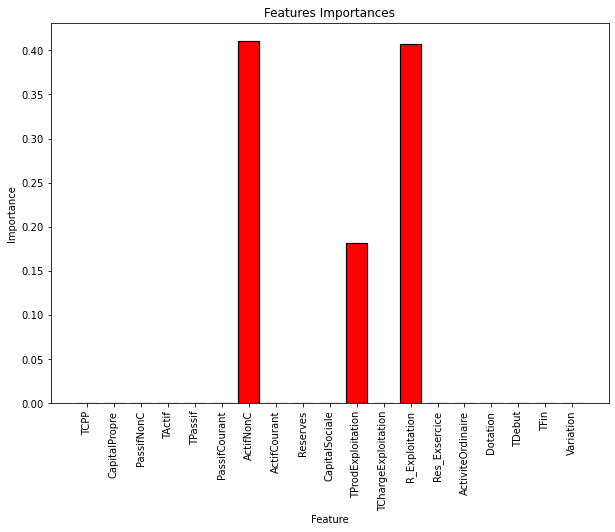

In [611]:
plt.figure(figsize=(10,7))
feature_list=X_train_td.columns
importances = list(final_dtrees.feature_importances_)
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

### Feature Selection using RFECV

In [614]:
selector = RFECV(final_dtrees,
                 step=1,
                 min_features_to_select=5,
                 cv=2)
selector.fit(X_train_td, y_train_td)
selector.grid_scores_


array([0.76410731, 0.77497687, 0.78561517, 0.78561517, 0.78561517,
       0.77497687, 0.78561517, 0.79648474, 0.78561517, 0.76387604,
       0.79648474, 0.77474561, 0.79648474, 0.77474561, 0.78561517])

In [615]:
selector.ranking_

array([8, 7, 6, 5, 4, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Display feature selected

In [616]:
feature_support = selector.get_support()
td_feature = X_train_td.loc[:,feature_support].columns.tolist()
td_feature

['ActifNonC',
 'Reserves',
 'CapitalSociale',
 'TProdExploitation',
 'TChargeExploitation',
 'R_Exploitation',
 'Res_Exsercice',
 'ActiviteOrdinaire',
 'Dotation',
 'TDebut',
 'TFin',
 'Variation']

In [617]:
print("We started with {0} features but retained only {1} of them!".format(X_train_td.shape[1], len(td_feature)))

We started with 19 features but retained only 12 of them!


In [618]:
X_train_td=X_train_td[td_feature]
X_test_td=X_test_td[td_feature]
final_dtrees.fit(X_train_td, y_train_td)

DecisionTreeClassifier(max_depth=3)

In [619]:
X_train_td.shape

(93, 12)

Displaying the train score and the test score after feature selection

In [620]:
score_train_td = cross_val_score(final_dtrees, X_train_td,y_train_td, cv= 5, n_jobs=1, scoring='accuracy')
score_test_td = cross_val_score(final_dtrees, X_test_td,y_test_td, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_td))
print('accuarcy test score',np.mean(score_test_td))

accuarcy train score 0.7970760233918128
accuarcy test score 0.7100000000000001


### Classification report

In [621]:
ypred =final_dtrees.predict(X_test_td)
print(classification_report(y_test_td, ypred))


              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.80      0.89      0.84        18

    accuracy                           0.75        24
   macro avg       0.65      0.61      0.62        24
weighted avg       0.72      0.75      0.73        24



In [622]:
X_train_td.shape

(93, 12)

# <font color=purpuple>Random Forest</font>

Creating a copy of the train set and test set

In [863]:
X_train_rf,y_train_rf,X_test_rf,y_test_rf = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

In [864]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': np.arange(1,15),'n_estimators': [50,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],}
grid=GridSearchCV( RandomForestClassifier(),param_grid,cv=5)
grid.fit(X_train_rf,y_train_rf)
grid.best_score_
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 50}

Displaying the train score and the test score 

In [866]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 9, max_features='auto',n_estimators= 50)
rf.fit(X_train_rf, y_train_rf)


RandomForestClassifier(max_depth=9, n_estimators=50)

In [867]:
score_train_rf = cross_val_score(rf, X_train_rf,y_train_rf, cv= 5, n_jobs=1, scoring='accuracy')
score_test_rf = cross_val_score(rf, X_test_rf,y_test_rf, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_rf))
print('accuarcy test score',np.mean(score_test_rf))

accuarcy train score 0.8058479532163743
accuarcy test score 0.7500000000000001


### Classification report

In [868]:
ypred_rf=rf.predict(X_test_rf)
print(classification_report(y_test_rf,ypred_rf,digits=3))

              precision    recall  f1-score   support

           0      0.800     0.667     0.727         6
           1      0.895     0.944     0.919        18

    accuracy                          0.875        24
   macro avg      0.847     0.806     0.823        24
weighted avg      0.871     0.875     0.871        24



### Confusion matrix visualization

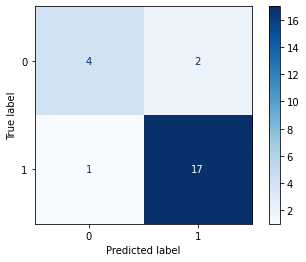

In [869]:
plot_confusion_matrix(rf, X_test_rf, y_test_rf,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

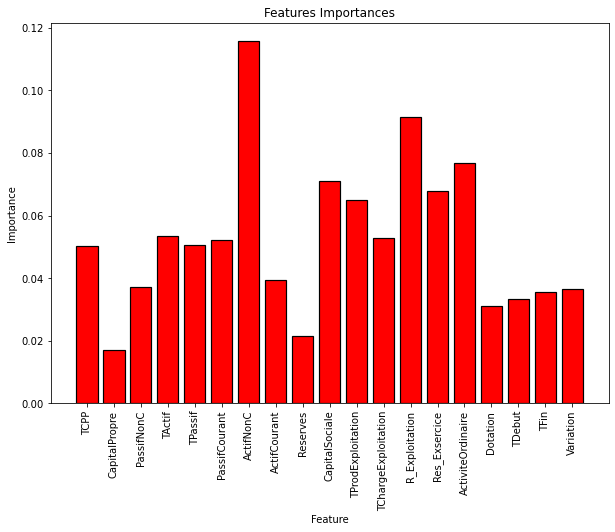

In [870]:
plt.figure(figsize=(10,7))
feature_list=X_train_rf.columns
importances = list(rf.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

Phone Service has the least importance 

### Feature Selection using RFECV

In [871]:
selector = RFECV(rf,
                 step=1,
                 min_features_to_select=5,
                 cv=5)
selector.fit(X_train_rf, y_train_rf)
print(selector.ranking_)
selector.grid_scores_

[1 1 1 1 1 1 1 4 5 1 1 1 1 1 1 1 3 2 1]


array([0.77426901, 0.7748538 , 0.79649123, 0.76315789, 0.80584795,
       0.78479532, 0.78421053, 0.79532164, 0.79590643, 0.79649123,
       0.80643275, 0.79590643, 0.77426901, 0.79473684, 0.79590643])

In [872]:
feature_rf = selector .get_support()
rf_feature = X_train_rf.loc[:,feature_rf].columns.tolist()
print('Selected features :')
print(rf_feature)
print('The number of features selected : ', len(rf_feature))

Selected features :
['TCPP', 'CapitalPropre', 'PassifNonC', 'TActif', 'TPassif', 'PassifCourant', 'ActifNonC', 'CapitalSociale', 'TProdExploitation', 'TChargeExploitation', 'R_Exploitation', 'Res_Exsercice', 'ActiviteOrdinaire', 'Dotation', 'Variation']
The number of features selected :  15


In [873]:
X_train_rf=X_train_rf[rf_feature]
X_test_rf=X_test_rf[rf_feature]
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier(max_depth=9, n_estimators=50)

In [874]:
score_train_rf = cross_val_score(rf, X_train_rf,y_train_rf, cv= 5, n_jobs=1, scoring='accuracy')
score_test_rf = cross_val_score(rf, X_test_rf,y_test_rf, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_rf))
print('accuarcy test score',np.mean(score_test_rf))

accuarcy train score 0.8058479532163743
accuarcy test score 0.79


In [875]:
ypred_rf=rf.predict(X_test_rf)
print(classification_report(y_test_rf,ypred_rf,digits=3))

              precision    recall  f1-score   support

           0      0.714     0.833     0.769         6
           1      0.941     0.889     0.914        18

    accuracy                          0.875        24
   macro avg      0.828     0.861     0.842        24
weighted avg      0.884     0.875     0.878        24



# <font color=purpuple>Standard SVM</font>

Creating a copy of the train set and test set

In [876]:
X_train_svm,y_train_svm,X_test_svm,y_test_svm = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [877]:
param_range =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}


grid = GridSearchCV(SVC(), param_grid, cv=5)

grid.fit(X_train_svm, y_train_svm)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [878]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Creating the model and displaying the train score and the test score 

In [879]:
svm =SVC(C= 10, gamma= 0.1, kernel= 'rbf')
svm.fit(X_test_svm, y_test_svm)


SVC(C=10, gamma=0.1)

In [880]:
score_train_svm = cross_val_score(svm,X_train_svm,y_train_svm, cv= 5, n_jobs=1, scoring='accuracy')
score_test_svm = cross_val_score(svm, X_test_svm,y_test_svm, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train_svm))
print('accuarcy test score',np.mean(score_test_svm))

accuarcy train score 0.8269005847953217
accuarcy test score 0.7100000000000001


### Classification report

In [881]:
ypred=svm.predict(X_test_svm)
print(classification_report(y_test_svm,ypred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.667     0.800         6
           1      0.900     1.000     0.947        18

    accuracy                          0.917        24
   macro avg      0.950     0.833     0.874        24
weighted avg      0.925     0.917     0.911        24



### Confusion matrix visualization

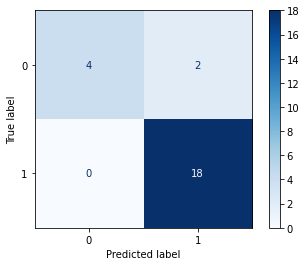

In [882]:
plot_confusion_matrix(svm, X_test_svm, y_test_svm,cmap=plt.cm.Blues)  
plt.show()

### Features Selection using Variance Threshold

In [883]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.97*(1-.97))
varsel=selector.fit(X_train_svm)
features=X_train_svm.loc[:, varsel.get_support()].columns.tolist()
print(features)

['TCPP', 'CapitalPropre', 'PassifNonC', 'TActif', 'TPassif', 'PassifCourant', 'ActifNonC', 'ActifCourant', 'Reserves', 'CapitalSociale', 'TProdExploitation', 'TChargeExploitation', 'R_Exploitation', 'Res_Exsercice', 'ActiviteOrdinaire', 'Dotation', 'TDebut', 'TFin', 'Variation']


In [884]:
print('We started by ',X_train_svm.shape[1],' features and we selected ',len(features),' features')

We started by  19  features and we selected  19  features


# <font color=red>Comparing the performance of the models </font>

### Train score and Test Score for each model

In [889]:
# Compare Algorithms

models = []
models.append(('Gradient Boost', final_Gbc, X_train_Gboost, y_train_Gboost, X_test_Gboost, y_test_Gboost,test_score_gb,train_score_gb  ))
models.append(('xgBoost', xgboost, X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb,test_score_xgb,train_score_xgb))
models.append(('Ada Boost', ab, X_train_ada, y_train_ada, X_test_ada, y_test_ada,score_test_ada,score_train_ada ))
models.append(('Logistic Regression', finalLog, X_train_lr, y_train_lr, X_test_lr, y_test_lr,score_test_lr,score_train_lr ))
models.append(('KNN', knn, X_train_knn, y_train_knn, X_test_knn, y_test_knn ,score_test_knn,score_train_knn))
models.append(('Decision Tree', final_dtrees , X_train_td ,y_train_td ,X_test_td, y_test_td,score_test_td,score_train_td ))
models.append(('Random Forest', rf, X_train_rf, y_train_rf, X_test_rf, y_test_rf,score_test_rf,score_train_rf ))
#models.append(('Gaussian NB', model, X_train_nb, y_train_nb, X_test_nb, y_test_nb))
models.append(('SVM', svm, X_train_svm, y_train_svm, X_test_svm, y_test_svm,score_test_svm,score_train_svm ))

# evaluate each model in turn
train_scores = []
test_scores = []
names = []
ypreds = []
f1_scores = []
aucs = []
precisions = []
recalls = []


scoring = 'accuracy'
for name, mod, x_train, y_train, x_test, y_test,testscore, trainscore in models:
    ypred=mod.predict(x_test)
    ypreds.append(ypred)
    precisions.append(precision_score(y_test, ypred))
    recalls.append(recall_score(y_test, ypred))
    f1_scores.append(f1_score(ypred, y_test))
    test_scores.append(np.mean(testscore))
    train_scores.append(np.mean(trainscore))
    names.append(name)
    
 

In [890]:
train_df= pd.DataFrame({'Algorithms':names, 'Train Score':train_scores, 'Test Score':test_scores, 'Recall':recalls,
                        'Precision':precisions,'F1_score':f1_scores})
train_df

,Algorithms,Train Score,Test Score,Recall,Precision,F1_score
0,Gradient Boost,0.816374,0.75,0.833333,0.882353,0.857143
1,xgBoost,0.774269,0.75,0.833333,0.882353,0.857143
2,Ada Boost,0.829240,0.71,0.944444,0.809524,0.871795
3,Logistic Regression,0.763158,0.83,0.944444,0.850000,0.894737
4,KNN,0.816374,0.70,0.777778,0.875000,0.823529
5,Decision Tree,0.797076,0.71,0.888889,0.800000,0.842105
6,Random Forest,0.805848,0.79,0.888889,0.941176,0.914286
7,SVM,0.826901,0.71,1.000000,0.900000,0.947368


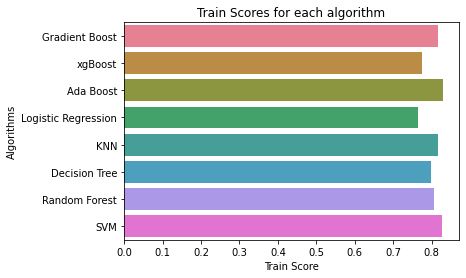

In [891]:
plot = sns.barplot("Train Score","Algorithms", data = train_df,
                palette="husl", orient = "h")

plot.set_xlabel("Train Score")
plot = plot.set_title("Train Scores for each algorithm")

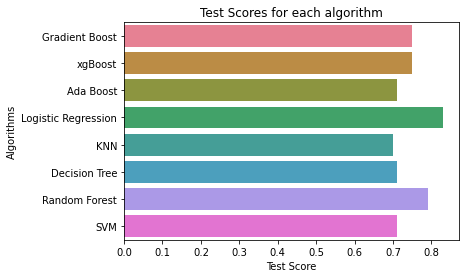

In [892]:
plot = sns.barplot("Test Score","Algorithms", data = train_df,
                palette="husl", orient = "h")

plot.set_xlabel("Test Score")
plot = plot.set_title("Test Scores for each algorithm")

### Roc Curve 

In [893]:
# Logistic regression

y_pred_prob_lr = finalLog.predict(X_test_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_lr, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test_lr, y_pred_prob_lr)

# Gradient Boost

y_pred_prob_Gboost = final_Gbc.predict(X_test_Gboost)
fpr_Gboost, tpr_Gboost, thresholds_Gboost = roc_curve(y_test_Gboost, y_pred_prob_Gboost)
roc_auc_Gboost = auc(fpr_Gboost, tpr_Gboost)
precision_Gboost, recall_Gboost, th_Gboost = precision_recall_curve(y_test_Gboost, y_pred_prob_Gboost)

# xgBoost

y_pred_prob_xgb = xgboost.predict(X_test_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_xgb, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
precision_xgb, recall_xgb, th_xgb = precision_recall_curve(y_test_xgb, y_pred_prob_xgb)

# Ada Boost

y_pred_prob_ada = ab.predict(X_test_ada)
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test_ada, y_pred_prob_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)
precision_ada, recall_ada, th_ada = precision_recall_curve(y_test_ada, y_pred_prob_ada)

# SVM 

y_pred_prob_SVM =svm.predict(X_test_svm)
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test_svm, y_pred_prob_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
precision_SVM, recall_SVM, th_SVM = precision_recall_curve(y_test_svm, y_pred_prob_SVM)


# KNN

y_pred_prob_KNN = knn.predict(X_test_knn)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test_knn, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test_knn, y_pred_prob_KNN)


# Decision Tree

y_pred_prob_td = final_dtrees.predict(X_test_td)
fpr_td, tpr_td, thresholds_td = roc_curve(y_test_td, y_pred_prob_td)
roc_auc_td = auc(fpr_td, tpr_td)
precision_td, recall_td, th_td = precision_recall_curve(y_test_td, y_pred_prob_td)

# Random forest

y_pred_prob_rf = rf.predict(X_test_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test_rf, y_pred_prob_rf)


### Roc Curves For each model

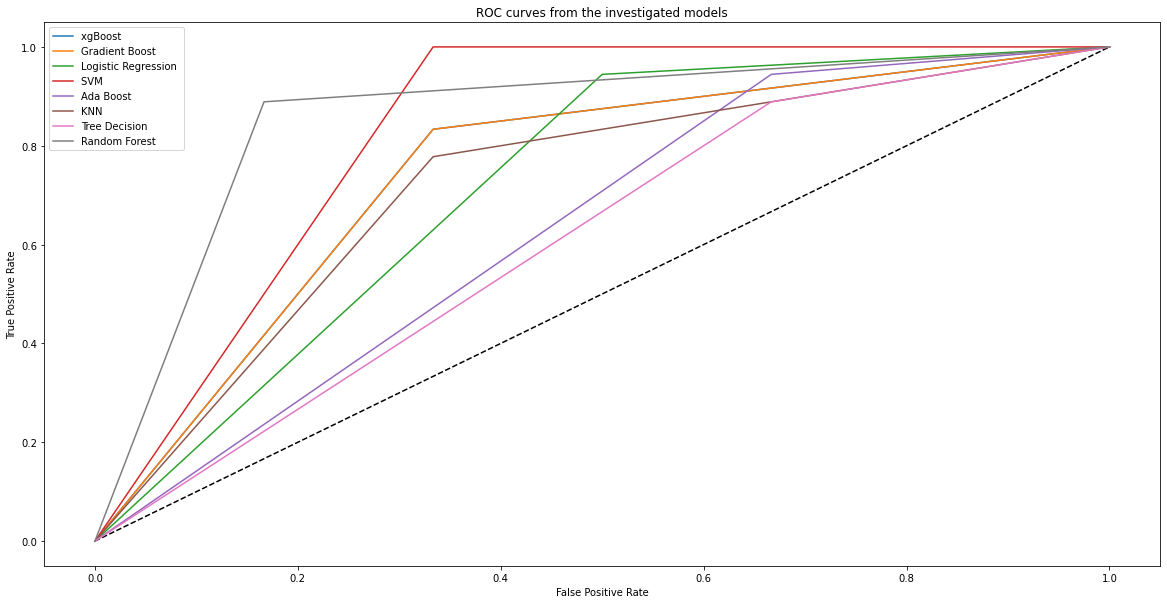

In [894]:
# Plot ROC curve
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='xgBoost ' % roc_auc_xgb)
plt.plot(fpr_Gboost, tpr_Gboost, label='Gradient Boost ' % roc_auc_Gboost)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression ' % roc_auc_lr)
plt.plot(fpr_SVM, tpr_SVM, label='SVM ' % roc_auc_SVM)
plt.plot(fpr_ada, tpr_ada, label='Ada Boost ' % roc_auc_ada)
plt.plot(fpr_KNN, tpr_KNN, label='KNN ' % roc_auc_KNN)
plt.plot(fpr_td, tpr_td, label='Tree Decision ' % roc_auc_td)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ' % roc_auc_rf)
#plt.plot(fpr_nb, tpr_nb, label='Naive Bayes ' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

In [897]:
print('SVM Area Under Curve ',roc_auc_SVM)
print('Random Forest ',roc_auc_rf)

SVM Area Under Curve  0.8333333333333334
Random Forest  0.8611111111111112


### Precision vs Recall

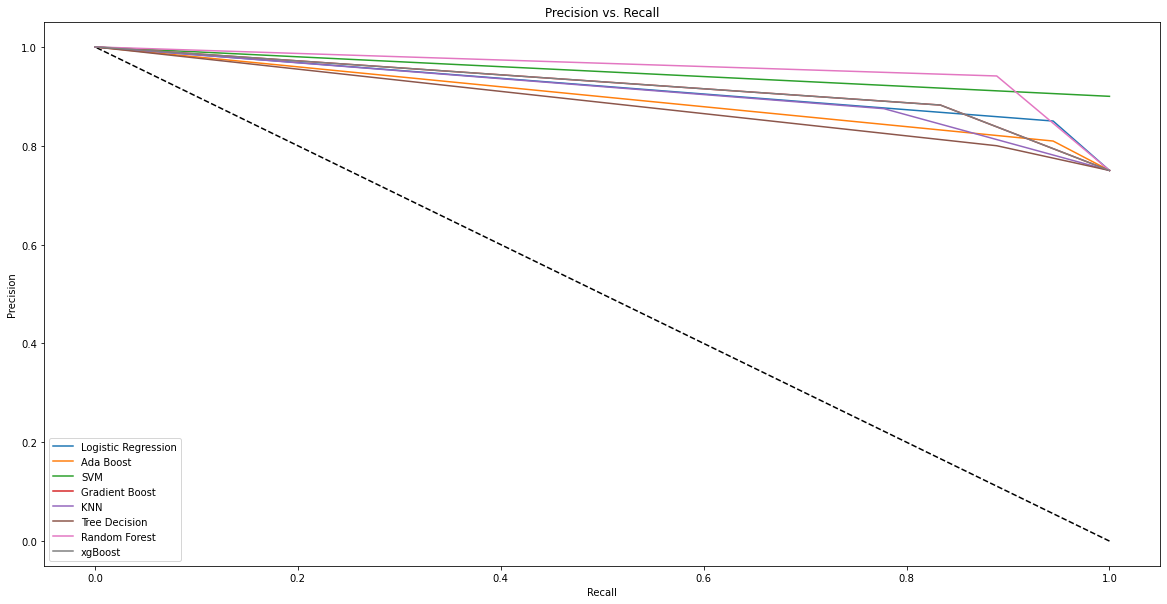

In [895]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_ada, precision_ada, label='Ada Boost')
plt.plot(recall_SVM, precision_SVM, label='SVM')
plt.plot(recall_Gboost, precision_Gboost, label='Gradient Boost')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_td, precision_td, label='Tree Decision')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, label='xgBoost')
plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()